##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [208]:
#%pip install pandas 
#%pip install matplotlib
#%pip install imbalanced-learn
#%pip install pyarrow
#%pip install scikit-learn
#%pip install seaborn
#%pip install numpy
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [209]:
# Can have as many cells as you want for code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import sklearn
from scipy import stats
filepath = "./data/catB_train.parquet" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [210]:
train = pd.read_parquet(filepath, engine='pyarrow')

# Overview of the dataset
# Dataset head
train.head()


,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,...,recency_giclaim,giclaim_cnt_success,recency_giclaim_success,giclaim_cnt_unsuccess,recency_giclaim_unsuccess,flg_gi_claim_29d435_ever,flg_gi_claim_058815_ever,flg_gi_claim_42e115_ever,flg_gi_claim_856320_ever,f_purchase_lh
19550,91b546e924,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
4600,896bae548c,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
13337,f364439ae6,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
19724,2647a81328,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN


In [211]:
# Original number of columns and rows
print('number of columns:', train.shape[1])
print('number of rows:', train.shape[0])

number of columns: 304
number of rows: 17992


### Purpose of the model: to predict the conversion rate of target users
- target columns: "f_purchase_1h"

### Requirement
1. Data Cleaning
2. Feature Selection
3. Data Analysis
4. Modelling
5. Reflection

#### Data Cleaning
- dealing with null values
- conversion of data types
- remove duplicate 
- remove inconsistent data
- remove inaccurate data
#### Feature Selection
- Remove low variance columns
- Remove low correlated columns
- Use chi-squared test for selection
- Data Balancing
#### Data Analysis
- involved in the data processing process
#### Modelling
- Random Forest
- Cross Validation Method: k-fold
#### Reflection
- Wait to be determined



### Section 1: Data Cleaning

#### 1. Remove duplicated values

In [212]:

train.drop_duplicates()

,clntnum,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,...,recency_giclaim,giclaim_cnt_success,recency_giclaim_success,giclaim_cnt_unsuccess,recency_giclaim_unsuccess,flg_gi_claim_29d435_ever,flg_gi_claim_058815_ever,flg_gi_claim_42e115_ever,flg_gi_claim_856320_ever,f_purchase_lh
19550,91b546e924,Chinese,Singapore,P,ACTIVE,2017-10-31,1974-05-09,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
4600,896bae548c,Chinese,Singapore,P,ACTIVE,2007-05-23,1979-11-11,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
13337,f364439ae6,Others,Singapore,P,ACTIVE,2019-08-31,1976-01-28,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
15074,70f319cfe1,Chinese,Singapore,P,ACTIVE,2021-10-18,1976-03-19,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
19724,2647a81328,Chinese,Singapore,P,ACTIVE,2018-07-20,1995-07-31,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,3363260248,None,Singapore,P,LAPSED,2016-08-01,1994-05-24,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
11964,c3509f0aef,Chinese,Singapore,P,ACTIVE,1990-03-20,1948-12-16,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
5390,6e44cfb3e7,Chinese,Singapore,P,ACTIVE,2007-12-31,1967-12-06,Female,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN
860,dd4e362f9f,Others,Singapore,P,ACTIVE,2007-09-01,1986-04-01,Male,0.0,0.0,...,NaN,None,None,None,None,None,None,None,None,NaN


#### 2. Process null values

In [213]:
#Number of null values in each column
train.isna().sum()

clntnum                         0
race_desc                    3996
ctrycode_desc                  20
clttype                         0
stat_flag                       0
                            ...  
flg_gi_claim_29d435_ever    17992
flg_gi_claim_058815_ever    17992
flg_gi_claim_42e115_ever    17992
flg_gi_claim_856320_ever    17992
f_purchase_lh               17282
Length: 304, dtype: int64

In [214]:
missing = train.isnull().sum().reset_index().rename(columns={0:'Num'})
missing['Rate'] = missing['Num']/train.shape[0]
missing = missing[missing.Rate>0].sort_values(by='Rate',ascending=False)
print('There are total of', missing.shape[0], "columns with missing values")

There are total of 111 columns with missing values


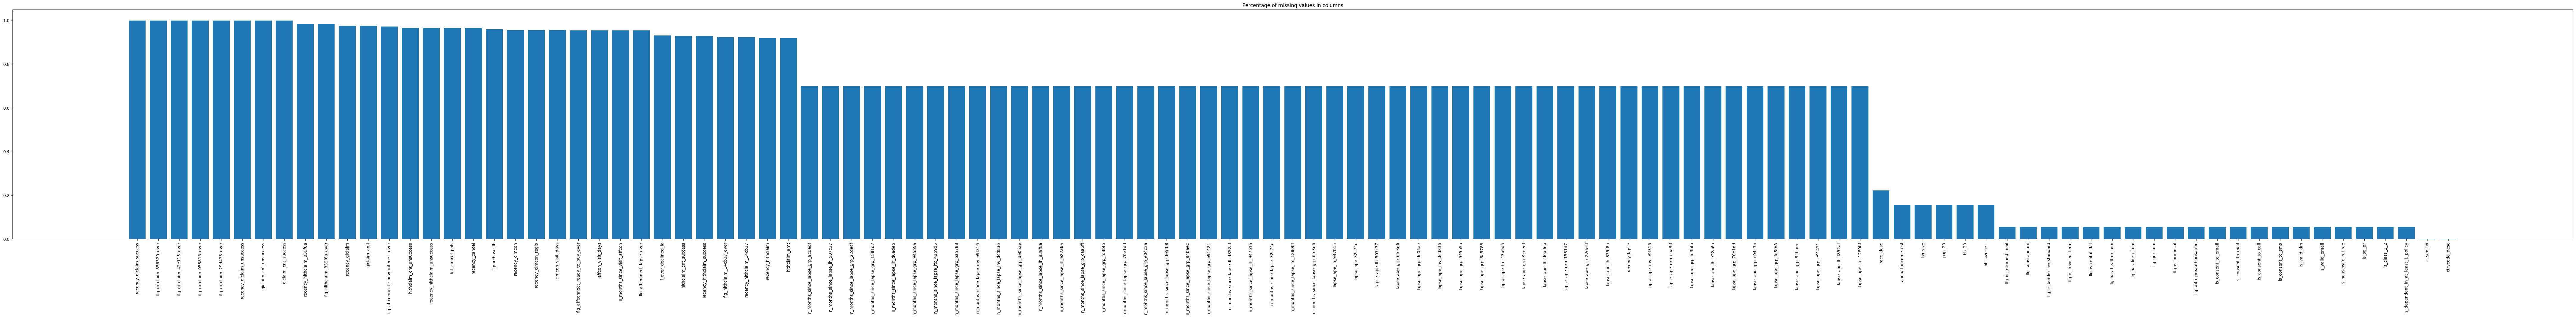

In [215]:
# Visualisation of columns with missing data
fig = plt.figure(figsize=(missing.shape[0],10))
plt.bar(np.arange(missing.shape[0]), list(missing.Rate.values), align = 'center')
plt.xticks(np.arange(missing.shape[0]),list(missing['index']))
pl.xticks(rotation=90)
plt.title('Percentage of missing values in columns')
plt.show()

In [216]:
# Estalish a threshold to remove columns when the percentage of null values reached 50% or more
# This threshold is established because we believe that when missing rate reached 50% or more, 
# our data imputation method would affect the final model.
dropcol = []
for column in train.columns:    
    if train[column].isna().sum()/len(train[column])>=0.5:
        if column == 'f_purchase_lh':
            continue
        #avoid removing target column
        dropcol.append(column)
        train.drop(column, axis= 1,inplace=True)

#### 3. Conversion for target column

In [217]:
train['f_purchase_lh'] = train['f_purchase_lh'].fillna(0)

#### 4. Imputation & conversion for non-numeric columns


In [218]:
#Drop identifier columns as there is no need to merge files
train.drop('clntnum',axis=1,inplace=True)

In [219]:
# Re-check the missing rate, to determine further actions
missing = train.isnull().sum().reset_index().rename(columns={0:'Num'})
missing['Rate'] = missing['Num']/train.shape[0]
missing = missing[missing.Rate>0].sort_values(by='Rate',ascending=False)
missing

,index,Num,Rate
0,race_desc,3996,0.222099
27,hh_20,2809,0.156125
30,hh_size_est,2809,0.156125
29,hh_size,2809,0.156125
28,pop_20,2809,0.156125
31,annual_income_est,2809,0.156125
10,flg_is_rental_flat,1014,0.056358
11,flg_has_health_claim,1014,0.056358
7,flg_substandard,1014,0.056358
8,flg_is_borderline_standard,1014,0.056358


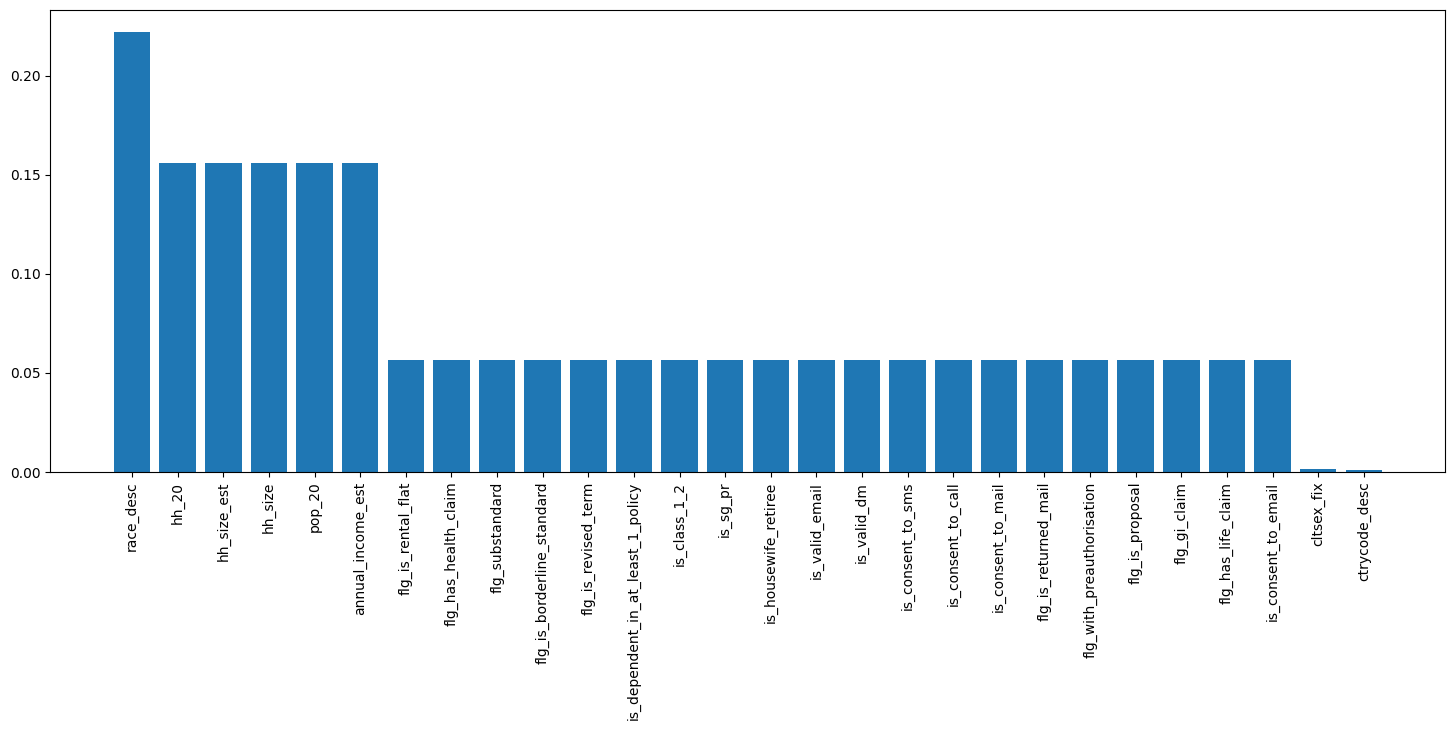

In [220]:
# Visualisation of columns with current missing data
fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(missing.shape[0]), list(missing.Rate.values), align = 'center')
plt.xticks(np.arange(missing.shape[0]),list(missing['index']))
pl.xticks(rotation=90)
plt.show()

In [221]:
# Drop missing rows of categorical data, as mathematical imputation does not work for categorical values
train = train[train['cltsex_fix'].notna()]
train = train[train['ctrycode_desc'].notna()]

In [222]:
# race_desc is a categorical data, however, we decide not to drop the rows with missing values considering the missing rate is over 20%
# instead, we will rename the category into numercial values and use modes for imputation
train['race_desc'].unique()

array(['Chinese', 'Others', 'Indian', None, 'Malay'], dtype=object)

In [223]:
train['race_desc'].replace({'Chinese':1, 'Malay':2, 'Indian':3, 'Others':4}, inplace=True)

In [224]:
train['race_desc'].unique()

array([ 1.,  4.,  3., nan,  2.])

In [225]:
#replace missing values with modes
train.loc[:,'race_desc'] = train.loc[:,'race_desc'].fillna(train['race_desc'].mode()[0])

In [226]:
#map them back
mapping = {1:'Chinese', 2:'Malay', 3:'Indian', 4:'Others'}
train.loc[:,'race_desc'] = train['race_desc'].map(mapping)

##### Imputation strategy
- For categorical variables, we impute the null values with random sampling or modes
- For numerical variables, we impute the null value based on the distribution

In [227]:
#For categorical variables with missing rate less than 10%, we will replace their null values with modes
missingless10 = missing[missing['Rate']<0.1]['index']
for column in missingless10:  
    train.loc[:,column] = train.loc[:,column].fillna(train[column].mode()[0])

For variables with missing rate larger than 10%:

Text(0, 0.5, 'Frequency')

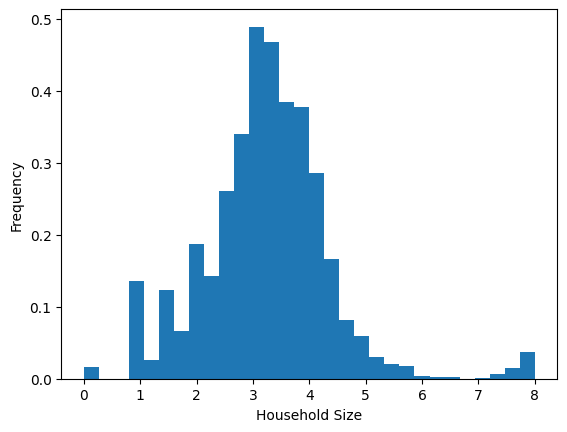

In [228]:
# continous variable: 'hh_size'
plt.hist(train['hh_size'], density=True, bins=30) 
plt.xlabel('Household Size')
plt.ylabel('Frequency')

In [229]:
# The distribution for househodl_size approximates to normal distribution, therefore, we will fill the null values with mean
train.loc[:,'hh_size'] = train.loc[:,'hh_size'].fillna(train['hh_size'].mean())

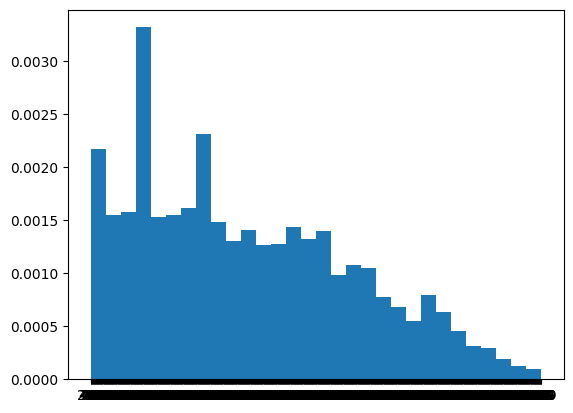

In [230]:
# discrete variables: 'pop_20','hh_20'
plt.hist(train[train['pop_20'].notna()]['pop_20'], density=True, bins=30) 
train.loc[:,'pop_20'] = train.loc[:,'pop_20'].fillna(train['pop_20'].median()) 
# given that this is a skewed distribution, we fill it with median

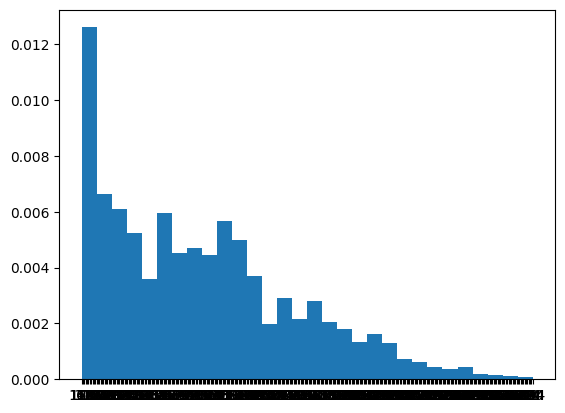

In [231]:
plt.hist(train[train['hh_20'].notna()]['hh_20'], density=True, bins=30) 
train.loc[:,'hh_20'] = train.loc[:,'hh_20'].fillna(train['hh_20'].median()) #similar management as pop20

In [232]:
# Now, we check over the current null values
missing = train.isnull().sum().reset_index().rename(columns={0:'Num'})
missing['Rate'] = missing['Num']/train.shape[0]
missing = missing[missing.Rate>0].sort_values(by='Rate',ascending=False)
missing

,index,Num,Rate
30,hh_size_est,2789,0.155385
31,annual_income_est,2789,0.155385


In [233]:
# categorical variable: hh_size_est
train['hh_size_est'].unique()

array(['1', '3', '4', '>4', '2', None, '0'], dtype=object)

In [234]:
# Denote '>4' with '5', and then convert them to numeric values
mapping = {'1':1, '2':2, '3':3, '4':4, '>4':5}
train.loc[:,'hh_size_est'] = train['hh_size_est'].map(mapping)

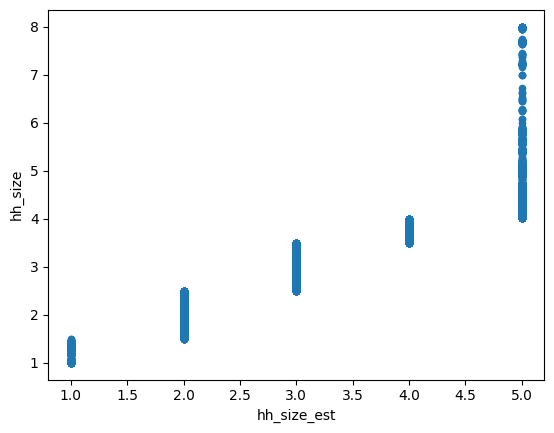

In [235]:
# Hypothetically test if there is a relationship between hh_size and hh_size_est
train.plot(kind='scatter', x='hh_size_est', y='hh_size')
plt.show()

In [236]:
# Through the scattered plot generated above, it is confirmed that hh_size_est is calculated based on hh_size, 
# and the categorical variables are based on grouping
# Find out the bar
print(train[train['hh_size_est']==1]['hh_size'].max())
print(train[train['hh_size_est']==2]['hh_size'].max())
print(train[train['hh_size_est']==3]['hh_size'].max())
print(train[train['hh_size_est']==4]['hh_size'].max())
print(train[train['hh_size_est']==5]['hh_size'].min())

1.4895104895104896
2.4952380952380953
3.49645390070922
4.0
4.00709219858156


1. For household size less than 1.5, their hh_size_est is 1
2. For household size less than 2.5, their hh_size_est is 2
3. For household size less than 3.5, their hh_size_est is 3
4. For household size less than 4, their hh_size_est is 4
5. For household size more than 4, their hh_size_est is 5

In [237]:
# We can now fill in those null values based on hh_size
def hhest(x):
    if x<1.5:
        return 1
    elif x<2.5:
        return 2
    elif x<3.5:
        return 3
    elif x<4:
        return 4
    else:
        return 5
rows = train[train['hh_size_est'].isnull()].index.tolist()
for row in rows:
    train.loc[row,'hh_size_est'] = hhest(train.loc[row,'hh_size'])

In [238]:
train.drop('hh_size',axis=1,inplace=True)

In [239]:
# categorical variable: 'annual_income_est'
train['annual_income_est'].unique()

array(['C.60K-100K', 'D.30K-60K', 'A.ABOVE200K', 'B.100K-200K',
       'E.BELOW30K', None], dtype=object)

In [240]:
# Converting to numeric representation
mapping = {'A.ABOVE200K':1, 'B.100K-200K':2, 'C.60K-100K':3, 'D.30K-60K':4, 'E.BELOW30K':5}
train.loc[:,'annual_income_est'].replace({'A.ABOVE200K':1, 'B.100K-200K':2, 'C.60K-100K':3, 'D.30K-60K':4, 'E.BELOW30K':5}, inplace=True)
train['annual_income_est'].unique()

array([ 3.,  4.,  1.,  2.,  5., nan])

In [241]:
# For 'annual_income_est', we use random sampling imputation
# extract a random sample
random_sample_df = train['annual_income_est'].dropna().sample(train['annual_income_est'].isnull().sum(), random_state=2024)
# re-index the randomly extracted sample
random_sample_df.index = train[train['annual_income_est'].isnull()].index
# replace the null values with random sampling
train.loc[train['annual_income_est'].isnull(), 'annual_income_est'] = random_sample_df

In [242]:
train.columns

Index(['race_desc', 'ctrycode_desc', 'clttype', 'stat_flag', 'min_occ_date',
       'cltdob_fix', 'cltsex_fix', 'flg_substandard',
       'flg_is_borderline_standard', 'flg_is_revised_term',
       ...
       'n_months_last_bought_grp_fe5fb8', 'n_months_last_bought_grp_94baec',
       'n_months_last_bought_grp_e91421', 'n_months_last_bought_lh_f852af',
       'n_months_last_bought_lh_947b15', 'n_months_last_bought_32c74c',
       'f_elx', 'f_mindef_mha', 'f_retail', 'f_purchase_lh'],
      dtype='object', length=220)

In [243]:
train['ctrycode_desc'].unique()

array(['Singapore', 'Not Applicable', 'Malaysia', 'United Kingdom',
       'Brunei Darussalam', 'Hong Kong', 'Indonesia', 'Philippines',
       'Thailand', 'Australia', 'United Arab Emirates', 'Japan', 'Spain',
       'China', 'Taiwan (R.O.C)', 'United States', 'Denmark',
       'Unknown Country Code', 'South Africa', 'Sweden', 'Ireland',
       'New Zealand', 'Netherlands', 'Italy', 'Bosnia-Herzegovina',
       'Canada'], dtype=object)

In [244]:
train['ctrycode_desc'].value_counts()

ctrycode_desc
Singapore               17766
Malaysia                   85
Not Applicable             20
Indonesia                  18
Australia                  10
United Kingdom              9
United States               5
China                       4
Thailand                    3
Taiwan (R.O.C)              3
Philippines                 3
Unknown Country Code        3
United Arab Emirates        3
Hong Kong                   2
Japan                       2
Denmark                     2
South Africa                2
Spain                       1
Brunei Darussalam           1
Sweden                      1
Ireland                     1
New Zealand                 1
Netherlands                 1
Italy                       1
Bosnia-Herzegovina          1
Canada                      1
Name: count, dtype: int64

In [245]:
# We combine unknown country code and Not Applicable to "Unknown"
# For those with count less than 10, they will be grouped into "Others"
# For the rest, not change
train['ctrycode_desc'].replace({'Not Applicable': 'Unknown', 'Unknown Country Code':'Unknown'}, inplace=True)

In [246]:
tbctry = train['ctrycode_desc'].value_counts().reset_index()
columnname = tbctry.columns
columnname

Index(['ctrycode_desc', 'count'], dtype='object')

In [247]:
columns = tbctry[tbctry[columnname[1]]<10][columnname[0]]
columns

5           United Kingdom
6            United States
7                    China
8           Taiwan (R.O.C)
9     United Arab Emirates
10                Thailand
11             Philippines
12                   Japan
13               Hong Kong
14                 Denmark
15            South Africa
16             New Zealand
17      Bosnia-Herzegovina
18                   Italy
19             Netherlands
20                   Spain
21                 Ireland
22                  Sweden
23       Brunei Darussalam
24                  Canada
Name: ctrycode_desc, dtype: object

In [248]:
train['ctrycode_desc'].replace({
    'United Kingdom':'Others',
    'United States':'Others',
    'China':'Others',
    'Taiwan (R.O.C)':'Others',
    'United Arab Emirates':'Others',
    'Thailand':'Others',
    'Philippines':'Others',
    'Japan':'Others',
    'Hong Kong':'Others',
    'Denmark':'Others',
    'South Africa':'Others',
    'New Zealand':'Others',
    'Bosnia-Herzegovina':'Others',
    'Italy':'Others',
    'Netherlands':'Others',
    'Spain':'Others',
    'Ireland':'Others',
    'Sweden':'Others',
    'Brunei Darussalam':'Others',
    'Canada':'Others'
},inplace=True)

In [249]:
train['ctrycode_desc'].unique()

array(['Singapore', 'Unknown', 'Malaysia', 'Others', 'Indonesia',
       'Australia'], dtype=object)

In [250]:
# hot code on gender:{'Female':0, 'Male':1}
train['cltsex_fix'].replace({'Female':0, 'Male':1},inplace=True)

In [251]:
# Check number of null value rows for 'min_occ_date' and 'cltdob_fix' columns
tempo = train[train['min_occ_date'] == 'None']
tempo2 = train[train['cltdob_fix'] == 'None']

In [252]:
print("Missing no. of rows for 'min_occ_date':", tempo.shape[0])

Missing no. of rows for 'min_occ_date': 10


In [253]:
print("Missing no. of rows for 'cltdob_fix':", tempo2.shape[0])

Missing no. of rows for 'cltdob_fix': 1


In [254]:
# Drop rows with missing datetime
# Since these rows are not able to be filled in through mathematical operations, considering its size,
# we believe that dropping them would not affect the scope of our project
train = train[train['min_occ_date']!='None']
train = train[train['cltdob_fix']!='None']

In [255]:
train['min_occ_date'] = pd.to_datetime(train['min_occ_date'])
train['cltdob_fix'] = pd.to_datetime(train['cltdob_fix'])

In [256]:
# Drop the rows where 'cltdob_fix' is large than 'min_occ_date'
train = train[train['min_occ_date']>train['cltdob_fix']]

In [257]:
# Convert date to age to help generate further investigations
from datetime import date
today = date.today()

In [258]:
train['cltdob_fix'] = today.year - train['cltdob_fix'].dt.year

In [259]:
Age = train['cltdob_fix'].unique()
Age.sort()
Age

array([ 10,  11,  12,  15,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        93,  94,  97, 100])

Text(0.5, 0, 'Age')

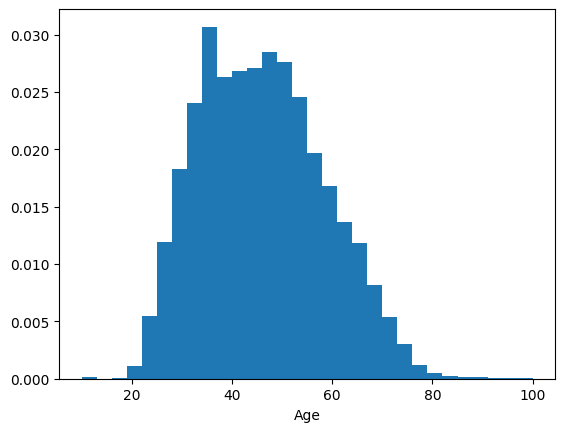

In [260]:
plt.hist(train['cltdob_fix'], density=True, bins=30) 
plt.xlabel('Age')

In [261]:
standard_deviations = 3
avg = train['cltdob_fix'].mean()
agestd = train['cltdob_fix'].std()
train = train[train['cltdob_fix'].apply(lambda x: (x-avg)/agestd <3)]

In [262]:
Age = train['cltdob_fix'].unique()
Age.sort()
Age

array([10, 11, 12, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82])

In [263]:
#Convert min_occ_date to month to help better analysis
def convert_to_month(x):
    if today.year - x.year >= 1:
        return (today.year - x.year)*12 + today.month - x.month
    else:
        return today.month - x.month
train.loc[:,'min_occ_date'] = train.loc[:,'min_occ_date'].apply(convert_to_month)

In [264]:
# Remove data larger than 648, considering that Singlife is established at 1970
print('max number of month:', train['min_occ_date'].unique().max())
# Therefore no need to clear data

max number of month: 634


In [265]:
train.describe

<bound method NDFrame.describe of       race_desc ctrycode_desc clttype stat_flag  min_occ_date  cltdob_fix  \
19550   Chinese     Singapore       P    ACTIVE            75          50   
4600    Chinese     Singapore       P    ACTIVE           200          45   
13337    Others     Singapore       P    ACTIVE            53          48   
15074   Chinese     Singapore       P    ACTIVE            27          48   
19724   Chinese     Singapore       P    ACTIVE            66          29   
...         ...           ...     ...       ...           ...         ...   
11284   Chinese     Singapore       P    LAPSED            89          30   
11964   Chinese     Singapore       P    ACTIVE           406          76   
5390    Chinese     Singapore       P    ACTIVE           193          57   
860      Others     Singapore       P    ACTIVE           196          38   
15795    Indian     Singapore       P    ACTIVE           147          54   

       cltsex_fix  flg_substandard  flg_i

#### 5. Combine columns with similar information

##### n-months since last bought an product

In [266]:
## separate n months based on difference insurance types: ltc, grp, lh, gi, inv, others
newtrain = train.copy()
last_bought_col_grp = [col for col in train.columns if col.startswith('n_months_last_bought_grp')]
last_bought_col_grp

['n_months_last_bought_grp_6fc3e6',
 'n_months_last_bought_grp_de05ae',
 'n_months_last_bought_grp_945b5a',
 'n_months_last_bought_grp_6a5788',
 'n_months_last_bought_grp_9cdedf',
 'n_months_last_bought_grp_1581d7',
 'n_months_last_bought_grp_22decf',
 'n_months_last_bought_grp_caa6ff',
 'n_months_last_bought_grp_fd3bfb',
 'n_months_last_bought_grp_70e1dd',
 'n_months_last_bought_grp_e04c3a',
 'n_months_last_bought_grp_fe5fb8',
 'n_months_last_bought_grp_94baec',
 'n_months_last_bought_grp_e91421']

In [267]:
newtrain[last_bought_col_grp] = newtrain[last_bought_col_grp].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train['n_months_last_bought_grp'] = newtrain[last_bought_col_grp].apply(lambda row: row.min(), axis=1)

In [268]:
last_bought_col_ltc = [col for col in train.columns if col.startswith('n_months_last_bought_ltc')]
last_bought_col_ltc

['n_months_last_bought_ltc',
 'n_months_last_bought_ltc_1280bf',
 'n_months_last_bought_ltc_43b9d5']

In [269]:
### check if the number of months of last_bought_ltc aligns with the data before
last_bought_col_ltc = last_bought_col_ltc[1:]
newtrain[last_bought_col_ltc] = newtrain[last_bought_col_ltc].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train['n_months_last_bought_ltc_check'] = newtrain[last_bought_col_ltc].apply(lambda row: row.min(), axis=1)
train.loc[train['n_months_last_bought_ltc'] != train['n_months_last_bought_ltc_check'], 'n_months_last_bought_ltc'] = train['n_months_last_bought_ltc_check']

In [270]:
last_bought_col_lh = [col for col in train.columns if col.startswith('n_months_last_bought_lh')]
last_bought_col_lh


['n_months_last_bought_lh_d0adeb',
 'n_months_last_bought_lh_507c37',
 'n_months_last_bought_lh_839f8a',
 'n_months_last_bought_lh_e22a6a',
 'n_months_last_bought_lh_f852af',
 'n_months_last_bought_lh_947b15']

In [271]:
newtrain[last_bought_col_lh] = newtrain[last_bought_col_lh].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train['n_months_last_bought_lh'] = newtrain[last_bought_col_lh].apply(lambda row: row.min(), axis=1)

In [272]:
last_bought_col_gi = [col for col in train.columns if col.startswith('n_months_last_bought_gi')]
last_bought_col_gi
#we will just leave it alone

['n_months_last_bought_gi']

In [273]:
last_bought_col_inv = [col for col in train.columns if col.startswith('n_months_last_bought_inv')]
last_bought_col_inv

['n_months_last_bought_inv_dcd836', 'n_months_last_bought_inv_e9f316']

In [274]:

newtrain[last_bought_col_inv] = newtrain[last_bought_col_inv].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train['n_months_last_bought_inv'] = newtrain[last_bought_col_inv].apply(lambda row: row.min(), axis=1)

In [275]:
## Delete the columns recording specific insurance products
train = train.drop(last_bought_col_grp, axis=1)
train = train.drop(last_bought_col_ltc, axis=1)
train = train.drop(last_bought_col_lh, axis=1)
train = train.drop(last_bought_col_inv, axis=1)
train = train.drop('n_months_last_bought_ltc_check', axis=1)

In [276]:
# Categorize the rest products without prefix lh/inv/gi/ltc/grp as others
newtrain = train.copy()
newtrain = newtrain.drop(['n_months_last_bought_products','n_months_last_bought_ltc',
                          'n_months_last_bought_gi','n_months_last_bought_grp',
                          'n_months_last_bought_lh','n_months_last_bought_inv'],axis=1)
last_bought_col = [col for col in newtrain.columns if col.startswith('n_months_last_bought_')]
last_bought_col

['n_months_last_bought_839f8a',
 'n_months_last_bought_e22a6a',
 'n_months_last_bought_d0adeb',
 'n_months_last_bought_c4bda5',
 'n_months_last_bought_507c37',
 'n_months_last_bought_32c74c']

In [277]:
train['n_months_last_bought_others'] = newtrain[last_bought_col].apply(lambda row: row.min(), axis=1)

In [278]:
train = train.drop('n_months_last_bought_products',axis=1)
#We now have columns with more specific contents on same topic
train = train.drop(last_bought_col, axis=1)

In [279]:
last_bought_col = [col for col in train.columns if col.startswith('n_months_last_bought_')]
last_bought_col

['n_months_last_bought_ltc',
 'n_months_last_bought_gi',
 'n_months_last_bought_grp',
 'n_months_last_bought_lh',
 'n_months_last_bought_inv',
 'n_months_last_bought_others']

In [280]:
train[last_bought_col].isna().sum()

n_months_last_bought_ltc       0
n_months_last_bought_gi        0
n_months_last_bought_grp       0
n_months_last_bought_lh        0
n_months_last_bought_inv       0
n_months_last_bought_others    0
dtype: int64

In [281]:
for column in last_bought_col:
    train[column] = pd.to_numeric(train[column])

In [282]:
#We first convert 9999 to 'never_bought'
for column in last_bought_col:
    train.loc[train[column] == 9999, column] = 'never_bought'
train[last_bought_col]

,n_months_last_bought_ltc,n_months_last_bought_gi,n_months_last_bought_grp,n_months_last_bought_lh,n_months_last_bought_inv,n_months_last_bought_others
19550,6,never_bought,never_bought,1,never_bought,1
4600,never_bought,never_bought,never_bought,140,never_bought,140
13337,never_bought,never_bought,never_bought,never_bought,never_bought,never_bought
15074,never_bought,never_bought,never_bought,never_bought,never_bought,never_bought
19724,never_bought,never_bought,never_bought,62,never_bought,62
...,...,...,...,...,...,...
11284,never_bought,never_bought,86,never_bought,never_bought,36
11964,never_bought,never_bought,never_bought,407,never_bought,407
5390,never_bought,never_bought,never_bought,never_bought,never_bought,never_bought
860,never_bought,46,194,never_bought,never_bought,194


In [284]:
#for the rest numeric data: we drop ones that are larger than 648 since Singlife is established in 1970
train[last_bought_col] = train[last_bought_col].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train[last_bought_col] = train[last_bought_col].apply(lambda col: col.where((col <= 648) | (pd.isna(col)), 'never_bought'))

In [285]:
#remove negative values
train[last_bought_col] = train[last_bought_col].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train[last_bought_col] = train[last_bought_col].apply(lambda col: col.where((col >= 0) | (pd.isna(col)), 'never_bought'))

In [286]:
nmonth = train[last_bought_col].copy()
nmonth.columns

Index(['n_months_last_bought_ltc', 'n_months_last_bought_gi',
       'n_months_last_bought_grp', 'n_months_last_bought_lh',
       'n_months_last_bought_inv', 'n_months_last_bought_others'],
      dtype='object')

In [110]:
for col in nmonth.columns:
    unique_values = train[col].unique()
    if (unique_values == 0).any():
        print(col, unique_values)

In [111]:
# Group nmonth columns before balancing the dataset
# Further grouping will be conducted through 
# There is no zero row, we could simply convert all 'never_bought' to 0
for col in nmonth.columns:
    train[col] = train[col].replace({'never_bought':0})
    unique_values = train[col].unique()
    print(col, unique_values)

n_months_last_bought_ltc [ 6  0 28 32 15  1 33 31 22 16 17 24 26 14 23 19 25 29  4 13 30 34  9  3
 10 27 11 18  5 20  2  7 21 12  8 35]
n_months_last_bought_gi [  0   4   8  22  90  45  54   6   2  81  51  52   9  14  99   5   1  50
  11  10  21  59  29  72  30  75  63 112   3  47  36 147  19  62  79  55
  77   7  70  38  64  31  16  65  58  82  43  15  49  41 144 104  66 123
  69  23 132  25  13  28 137  12  85  57  86  26  48  97 122  56 121  46
  53 120  17 101  95  34  96  44  60  94  71  91  88  76 100 151  67  93
 117 155  18 116  92  73  98 135  35  37  24 103  61 148 105 143  87 111
 158  68  84 130  80  78  83  20  32 106  40  42  33 149 136 128 141 140
 119 125  74 109 154 159  27 150 115 108 139  89  39 146 152 124 113 110
 102 114 157]
n_months_last_bought_grp [  0   8  82   1  73   9  14  43  85 250 118  52  64 159 186 319  20  27
  56 464  32 178  13   2 185  81 153   5 196  12   4 258 394  50 109 269
  84 199 165   6 104  93 179  51 115 101 202  59 164  76  44 221  90  3

In [112]:
# Convert nmonth to year
for col in nmonth.columns:
    train[col] = train[col]/12
    unique_values = train[col].unique()
    print(col, unique_values)

n_months_last_bought_ltc [0.5        0.         2.33333333 2.66666667 1.25       0.08333333
 2.75       2.58333333 1.83333333 1.33333333 1.41666667 2.
 2.16666667 1.16666667 1.91666667 1.58333333 2.08333333 2.41666667
 0.33333333 1.08333333 2.5        2.83333333 0.75       0.25
 0.83333333 2.25       0.91666667 1.5        0.41666667 1.66666667
 0.16666667 0.58333333 1.75       1.         0.66666667 2.91666667]
n_months_last_bought_gi [ 0.          0.33333333  0.66666667  1.83333333  7.5         3.75
  4.5         0.5         0.16666667  6.75        4.25        4.33333333
  0.75        1.16666667  8.25        0.41666667  0.08333333  4.16666667
  0.91666667  0.83333333  1.75        4.91666667  2.41666667  6.
  2.5         6.25        5.25        9.33333333  0.25        3.91666667
  3.         12.25        1.58333333  5.16666667  6.58333333  4.58333333
  6.41666667  0.58333333  5.83333333  3.16666667  5.33333333  2.58333333
  1.33333333  5.41666667  4.83333333  6.83333333  3.58333333  1.2

In [113]:
#Now let's drop f_ever bought, considering we already have n_months for indication
ever_bought_col = [col for col in newtrain.columns if col.startswith('f_ever_bought_')]
ever_bought_col

['f_ever_bought_839f8a',
 'f_ever_bought_e22a6a',
 'f_ever_bought_d0adeb',
 'f_ever_bought_c4bda5',
 'f_ever_bought_ltc',
 'f_ever_bought_507c37',
 'f_ever_bought_gi',
 'f_ever_bought_ltc_1280bf',
 'f_ever_bought_grp_6fc3e6',
 'f_ever_bought_grp_de05ae',
 'f_ever_bought_inv_dcd836',
 'f_ever_bought_grp_945b5a',
 'f_ever_bought_grp_6a5788',
 'f_ever_bought_ltc_43b9d5',
 'f_ever_bought_grp_9cdedf',
 'f_ever_bought_lh_d0adeb',
 'f_ever_bought_grp_1581d7',
 'f_ever_bought_grp_22decf',
 'f_ever_bought_lh_507c37',
 'f_ever_bought_lh_839f8a',
 'f_ever_bought_inv_e9f316',
 'f_ever_bought_grp_caa6ff',
 'f_ever_bought_grp_fd3bfb',
 'f_ever_bought_lh_e22a6a',
 'f_ever_bought_grp_70e1dd',
 'f_ever_bought_grp_e04c3a',
 'f_ever_bought_grp_fe5fb8',
 'f_ever_bought_grp_94baec',
 'f_ever_bought_grp_e91421',
 'f_ever_bought_lh_f852af',
 'f_ever_bought_lh_947b15',
 'f_ever_bought_32c74c']

In [114]:
train = train.drop(ever_bought_col,axis=1)
train

,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,...,n_months_last_bought_ltc,n_months_last_bought_gi,f_elx,f_mindef_mha,f_retail,f_purchase_lh,n_months_last_bought_grp,n_months_last_bought_lh,n_months_last_bought_inv,n_months_last_bought_others
19550,Chinese,Singapore,P,ACTIVE,75,50,0,0.0,0.0,0.0,...,0.5,0.000000,0,0,1,0.0,0.000000,0.083333,0.0,0.083333
4600,Chinese,Singapore,P,ACTIVE,200,45,1,0.0,0.0,0.0,...,0.0,0.000000,0,0,1,0.0,0.000000,11.666667,0.0,11.666667
13337,Others,Singapore,P,ACTIVE,53,48,1,0.0,0.0,0.0,...,0.0,0.000000,0,0,1,0.0,0.000000,0.000000,0.0,0.000000
15074,Chinese,Singapore,P,ACTIVE,27,48,0,0.0,0.0,0.0,...,0.0,0.000000,0,0,1,0.0,0.000000,0.000000,0.0,0.000000
19724,Chinese,Singapore,P,ACTIVE,66,29,0,0.0,0.0,0.0,...,0.0,0.000000,0,0,1,0.0,0.000000,5.166667,0.0,5.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Chinese,Singapore,P,LAPSED,89,30,1,0.0,0.0,0.0,...,0.0,0.000000,0,0,1,0.0,7.166667,0.000000,0.0,3.000000
11964,Chinese,Singapore,P,ACTIVE,406,76,1,0.0,0.0,0.0,...,0.0,0.000000,0,0,1,0.0,0.000000,33.916667,0.0,33.916667
5390,Chinese,Singapore,P,ACTIVE,193,57,0,0.0,0.0,0.0,...,0.0,0.000000,0,0,1,0.0,0.000000,0.000000,0.0,0.000000
860,Others,Singapore,P,ACTIVE,196,38,1,0.0,0.0,0.0,...,0.0,3.833333,0,1,0,0.0,16.166667,0.000000,0.0,16.166667


##### f_hold columns

In [115]:
# Join f_hold columns based on type: others, ltc, gi
# Join others
f_hold_col = [col for col in newtrain.columns if col.startswith('f_hold_')]
f_hold_col

['f_hold_839f8a',
 'f_hold_e22a6a',
 'f_hold_d0adeb',
 'f_hold_c4bda5',
 'f_hold_ltc',
 'f_hold_507c37',
 'f_hold_gi']

In [116]:
holdtrain = train[f_hold_col].copy()
holdtrain.drop(['f_hold_gi','f_hold_ltc'], axis=1, inplace=True)
holdtrain.describe

<bound method NDFrame.describe of        f_hold_839f8a  f_hold_e22a6a  f_hold_d0adeb  f_hold_c4bda5  \
19550              0              1              0              0   
4600               0              0              0              0   
13337              0              0              0              0   
15074              0              0              0              0   
19724              0              0              0              0   
...              ...            ...            ...            ...   
11284              0              0              0              0   
11964              0              0              0              0   
5390               0              0              0              0   
860                0              0              0              0   
15795              0              0              0              0   

       f_hold_507c37  
19550              0  
4600               0  
13337              0  
15074              0  
19724              1  

In [117]:
f_hold_col = holdtrain.columns
f_hold_col

Index(['f_hold_839f8a', 'f_hold_e22a6a', 'f_hold_d0adeb', 'f_hold_c4bda5',
       'f_hold_507c37'],
      dtype='object')

In [118]:
holdtrain[f_hold_col] = holdtrain[f_hold_col].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train['f_hold_others'] = holdtrain[f_hold_col].apply(lambda row: row.sum(), axis=1)

In [119]:
#drop the respective columns
train.drop(f_hold_col, axis=1, inplace=True)

In [120]:
train.describe

<bound method NDFrame.describe of       race_desc ctrycode_desc clttype stat_flag  min_occ_date  cltdob_fix  \
19550   Chinese     Singapore       P    ACTIVE            75          50   
4600    Chinese     Singapore       P    ACTIVE           200          45   
13337    Others     Singapore       P    ACTIVE            53          48   
15074   Chinese     Singapore       P    ACTIVE            27          48   
19724   Chinese     Singapore       P    ACTIVE            66          29   
...         ...           ...     ...       ...           ...         ...   
11284   Chinese     Singapore       P    LAPSED            89          30   
11964   Chinese     Singapore       P    ACTIVE           406          76   
5390    Chinese     Singapore       P    ACTIVE           193          57   
860      Others     Singapore       P    ACTIVE           196          38   
15795    Indian     Singapore       P    ACTIVE           147          54   

       cltsex_fix  flg_substandard  flg_i

In [121]:
train.head()

,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,...,n_months_last_bought_gi,f_elx,f_mindef_mha,f_retail,f_purchase_lh,n_months_last_bought_grp,n_months_last_bought_lh,n_months_last_bought_inv,n_months_last_bought_others,f_hold_others
19550,Chinese,Singapore,P,ACTIVE,75,50,0,0.0,0.0,0.0,...,0.0,0,0,1,0.0,0.0,0.083333,0.0,0.083333,1
4600,Chinese,Singapore,P,ACTIVE,200,45,1,0.0,0.0,0.0,...,0.0,0,0,1,0.0,0.0,11.666667,0.0,11.666667,0
13337,Others,Singapore,P,ACTIVE,53,48,1,0.0,0.0,0.0,...,0.0,0,0,1,0.0,0.0,0.000000,0.0,0.000000,0
15074,Chinese,Singapore,P,ACTIVE,27,48,0,0.0,0.0,0.0,...,0.0,0,0,1,0.0,0.0,0.000000,0.0,0.000000,0
19724,Chinese,Singapore,P,ACTIVE,66,29,0,0.0,0.0,0.0,...,0.0,0,0,1,0.0,0.0,5.166667,0.0,5.166667,1


##### Payment type and amount for a product

In [122]:
#ape(gi, grp, lh, ltc, inv)
newtrain = train.copy()
ape_grp = [col for col in train.columns if col.startswith('ape_grp_')]
ape_gi = [col for col in train.columns if col.startswith('ape_gi_')]
ape_lh = [col for col in train.columns if col.startswith('ape_lh_')]
ape_ltc =[col for col in train.columns if col.startswith('ape_ltc_')]
ape_inv = [col for col in train.columns if col.startswith('ape_inv_')]
ape_tot = [col for col in train.columns if col.startswith('ape_')]

In [123]:
print(ape_grp)
print(ape_gi)
print(ape_ltc)
print(ape_inv)
print(ape_lh)

['ape_grp_6fc3e6', 'ape_grp_de05ae', 'ape_grp_945b5a', 'ape_grp_6a5788', 'ape_grp_9cdedf', 'ape_grp_1581d7', 'ape_grp_22decf', 'ape_grp_caa6ff', 'ape_grp_fd3bfb', 'ape_grp_70e1dd', 'ape_grp_e04c3a', 'ape_grp_fe5fb8', 'ape_grp_94baec', 'ape_grp_e91421']
['ape_gi_42e115', 'ape_gi_a10d1b', 'ape_gi_29d435', 'ape_gi_856320', 'ape_gi_058815']
['ape_ltc_1280bf', 'ape_ltc_43b9d5']
['ape_inv_dcd836', 'ape_inv_e9f316']
['ape_lh_d0adeb', 'ape_lh_507c37', 'ape_lh_839f8a', 'ape_lh_e22a6a', 'ape_lh_f852af', 'ape_lh_947b15']


In [124]:
print(ape_tot)

['ape_gi_42e115', 'ape_ltc_1280bf', 'ape_grp_6fc3e6', 'ape_grp_de05ae', 'ape_inv_dcd836', 'ape_grp_945b5a', 'ape_grp_6a5788', 'ape_ltc_43b9d5', 'ape_grp_9cdedf', 'ape_lh_d0adeb', 'ape_grp_1581d7', 'ape_grp_22decf', 'ape_lh_507c37', 'ape_lh_839f8a', 'ape_inv_e9f316', 'ape_gi_a10d1b', 'ape_gi_29d435', 'ape_grp_caa6ff', 'ape_grp_fd3bfb', 'ape_lh_e22a6a', 'ape_grp_70e1dd', 'ape_grp_e04c3a', 'ape_grp_fe5fb8', 'ape_gi_856320', 'ape_grp_94baec', 'ape_gi_058815', 'ape_grp_e91421', 'ape_lh_f852af', 'ape_lh_947b15', 'ape_32c74c', 'ape_839f8a', 'ape_e22a6a', 'ape_d0adeb', 'ape_c4bda5', 'ape_ltc', 'ape_507c37', 'ape_gi']


In [125]:

newtrain[ape_tot] = newtrain[ape_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train[ape_tot] = train[ape_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train['ape_grp_test'] = newtrain[ape_grp].apply(lambda row: row.sum(), axis=1)
train['ape_gi_test'] = newtrain[ape_gi].apply(lambda row: row.sum(), axis=1)
train['ape_lh_test'] = newtrain[ape_lh].apply(lambda row: row.sum(), axis=1)
train['ape_ltc_test'] = newtrain[ape_ltc].apply(lambda row: row.sum(), axis=1)
train['ape_inv_test'] = newtrain[ape_inv].apply(lambda row: row.sum(), axis=1)
unequal_rows = train[train['ape_ltc_test'] != train['ape_ltc']]
print(len(unequal_rows))


111


In [126]:
print(unequal_rows["ape_ltc"])
print(unequal_rows["ape_ltc_test"])

18769    1269.60
8845     1686.24
10250     596.64
14319     991.80
11503     254.08
          ...   
10015     495.36
13323    1129.79
13584     697.50
18032     817.24
12383     426.60
Name: ape_ltc, Length: 111, dtype: float64
18769      0.0
8845     510.0
10250      0.0
14319    699.0
11503      0.0
         ...  
10015      0.0
13323      0.0
13584      0.0
18032    535.0
12383      0.0
Name: ape_ltc_test, Length: 111, dtype: float64


###
- there are 111 rows of unequal values between the mannually compute ape_ltc_test column and original column of ape_ltc
- According to comparision between the two columns, we can see that the values in the original ape_ltc column is generall larger than the manually computed value, we can assume that since there might be other unrecorded ltc product
- Therefore, we decided to keep the original ape_ltc column to record the data of total ape spend on ltc product of a client
- The same logic applies to ape_gi column.
###

In [127]:
train = train.drop('ape_ltc_test', axis=1)


In [128]:
# for ape_gi records, the manually computed value exactly matches with the original column
unequal_rows = train[train['ape_gi_test'] != train['ape_gi']]
print(len(unequal_rows))

0


In [129]:
# therefore, drop the manually computed column for ape_gi
train = train.drop('ape_gi_test', axis=1)

In [130]:
train = train.drop(ape_grp, axis=1)
train = train.drop(ape_gi, axis=1)
train = train.drop(ape_inv, axis=1)
train = train.drop(ape_ltc, axis=1)
train = train.drop(ape_lh, axis=1)


In [131]:
# the columns that are left with: "ape_gi" "ape_ltc" "ape_grp_test" "ape_lh_test" "ape_inv_test"
newtrain = train.copy()
newtrain = newtrain.drop('ape_lh_test', axis=1)
newtrain = newtrain.drop('ape_ltc', axis=1)
newtrain = newtrain.drop("ape_grp_test", axis=1)
newtrain = newtrain.drop("ape_inv_test", axis=1)
newtrain = newtrain.drop("ape_gi", axis=1)


In [132]:
ape_others = [col for col in newtrain.columns if col.startswith('ape_')]
ape_others
train['ape_others'] = train[ape_others].apply(lambda row: row.sum(), axis=1)
train['ape_others']
train = train.drop(ape_others, axis=1)


In [133]:
ape_tot = [col for col in train.columns if col.startswith('ape_')]
print(ape_tot)

['ape_ltc', 'ape_gi', 'ape_grp_test', 'ape_lh_test', 'ape_inv_test', 'ape_others']


In [134]:

train['ape_tot']= train[ape_tot].apply(lambda row: row.sum(), axis=1)
train['ape_tot']
ape = [col for col in train.columns if col.startswith('ape')]
print(ape)


['ape_ltc', 'ape_gi', 'ape_grp_test', 'ape_lh_test', 'ape_inv_test', 'ape_others', 'ape_tot']


In [135]:
prempaid = [col for col in train.columns if col.startswith('prempaid')]
print(prempaid)


['prempaid_gi_42e115', 'prempaid_ltc_1280bf', 'prempaid_grp_6fc3e6', 'prempaid_grp_de05ae', 'prempaid_inv_dcd836', 'prempaid_grp_945b5a', 'prempaid_grp_6a5788', 'prempaid_ltc_43b9d5', 'prempaid_grp_9cdedf', 'prempaid_lh_d0adeb', 'prempaid_grp_1581d7', 'prempaid_grp_22decf', 'prempaid_lh_507c37', 'prempaid_lh_839f8a', 'prempaid_inv_e9f316', 'prempaid_gi_a10d1b', 'prempaid_gi_29d435', 'prempaid_grp_caa6ff', 'prempaid_grp_fd3bfb', 'prempaid_lh_e22a6a', 'prempaid_grp_70e1dd', 'prempaid_grp_e04c3a', 'prempaid_grp_fe5fb8', 'prempaid_gi_856320', 'prempaid_grp_94baec', 'prempaid_gi_058815', 'prempaid_grp_e91421', 'prempaid_lh_f852af', 'prempaid_lh_947b15', 'prempaid_32c74c', 'prempaid_839f8a', 'prempaid_e22a6a', 'prempaid_d0adeb', 'prempaid_c4bda5', 'prempaid_ltc', 'prempaid_507c37', 'prempaid_gi']


In [136]:
newtrain = train.copy()
prempaid_grp = [col for col in train.columns if col.startswith('prempaid_grp_')]
prempaid_gi = [col for col in train.columns if col.startswith('prempaid_gi_')]
prempaid_lh = [col for col in train.columns if col.startswith('prempaid_lh_')]
prempaid_ltc = [col for col in train.columns if col.startswith('prempaid_ltc_')]
prempaid_inv = [col for col in train.columns if col.startswith('prempaid_inv_')]
prempaid_tot = [col for col in train.columns if col.startswith('prempaid_')]

In [137]:

newtrain[prempaid_tot] = newtrain[prempaid_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train[prempaid_tot] = train[prempaid_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train['prempaid_grp_test'] = newtrain[prempaid_grp].apply(lambda row: row.sum(), axis=1)
train['prempaid_gi_test'] = newtrain[prempaid_gi].apply(lambda row: row.sum(), axis=1)
train['prempaid_lh_test'] = newtrain[prempaid_lh].apply(lambda row: row.sum(), axis=1)
train['prempaid_ltc_test'] = newtrain[prempaid_ltc].apply(lambda row: row.sum(), axis=1)
train['prempaid_inv_test'] = newtrain[prempaid_inv].apply(lambda row: row.sum(), axis=1)


In [138]:
unequal_rows = train[train['prempaid_ltc_test'] != train['prempaid_ltc']]
print(len(unequal_rows))
print(unequal_rows["prempaid_ltc"])
print(unequal_rows["prempaid_ltc_test"])
### 
# Same logic as ape_ltc
###
train = train.drop('prempaid_ltc_test', axis=1)
# for prempaid_gi records, the manually computed value exactly matches with the original column
unequal_rows = train[train['prempaid_gi_test'] != train['prempaid_gi']]
print(len(unequal_rows))


111
18769    67288.80
8845     89370.72
10250    31621.92
14319    52565.40
11503    13466.24
           ...   
10015    26254.08
13323    59878.87
13584    36967.50
18032    43313.72
12383    22609.80
Name: prempaid_ltc, Length: 111, dtype: float64
18769        0.0
8845     27030.0
10250        0.0
14319    37047.0
11503        0.0
          ...   
10015        0.0
13323        0.0
13584        0.0
18032    28355.0
12383        0.0
Name: prempaid_ltc_test, Length: 111, dtype: float64
0


In [139]:
# therefore, drop the manually computed column for prempaid_gi
train = train.drop('prempaid_gi_test', axis=1)
train = train.drop(prempaid_grp, axis=1)
train = train.drop(prempaid_gi, axis=1)
train = train.drop(prempaid_inv, axis=1)
train = train.drop(prempaid_ltc, axis=1)
train = train.drop(prempaid_lh, axis=1)


In [140]:
newtrain = train.copy()
newtrain = newtrain.drop('prempaid_lh_test', axis=1)
newtrain = newtrain.drop('prempaid_ltc', axis=1)
newtrain = newtrain.drop("prempaid_grp_test", axis=1)
newtrain = newtrain.drop("prempaid_inv_test", axis=1)
newtrain = newtrain.drop("prempaid_gi", axis=1)


In [141]:
prempaid_others = [col for col in newtrain.columns if col.startswith('prempaid_')]
prempaid_others
train['prempaid_others'] = train[prempaid_others].apply(lambda row: row.sum(), axis=1)
train['prempaid_others']
train = train.drop(prempaid_others, axis=1)
prempaid_tot = [col for col in train.columns if col.startswith('prempaid_')]

In [142]:

train['prempaid_tot']= train[prempaid_tot].apply(lambda row: row.sum(), axis=1)
train['prempaid_tot']
prempaid = [col for col in train.columns if col.startswith('prempaid')]
print(prempaid)


['prempaid_ltc', 'prempaid_gi', 'prempaid_grp_test', 'prempaid_lh_test', 'prempaid_inv_test', 'prempaid_others', 'prempaid_tot']


In [143]:
sumins = [col for col in train.columns if col.startswith('sumins')]
print(sumins)


['sumins_gi_42e115', 'sumins_ltc_1280bf', 'sumins_grp_6fc3e6', 'sumins_grp_de05ae', 'sumins_inv_dcd836', 'sumins_grp_945b5a', 'sumins_grp_6a5788', 'sumins_ltc_43b9d5', 'sumins_grp_9cdedf', 'sumins_lh_d0adeb', 'sumins_grp_1581d7', 'sumins_grp_22decf', 'sumins_lh_507c37', 'sumins_inv_e9f316', 'sumins_gi_a10d1b', 'sumins_gi_29d435', 'sumins_grp_caa6ff', 'sumins_grp_fd3bfb', 'sumins_lh_e22a6a', 'sumins_grp_70e1dd', 'sumins_grp_e04c3a', 'sumins_grp_fe5fb8', 'sumins_gi_856320', 'sumins_grp_94baec', 'sumins_gi_058815', 'sumins_grp_e91421', 'sumins_lh_f852af', 'sumins_lh_947b15', 'sumins_32c74c', 'sumins_839f8a', 'sumins_e22a6a', 'sumins_d0adeb', 'sumins_c4bda5', 'sumins_ltc', 'sumins_507c37', 'sumins_gi']


In [144]:
newtrain = train.copy()
sumins_grp = [col for col in train.columns if col.startswith('sumins_grp_')]
sumins_gi = [col for col in train.columns if col.startswith('sumins_gi_')]
sumins_lh = [col for col in train.columns if col.startswith('sumins_lh_')]
sumins_ltc = [col for col in train.columns if col.startswith('sumins_ltc_')]
sumins_inv = [col for col in train.columns if col.startswith('sumins_inv_')]
sumins_tot = [col for col in train.columns if col.startswith('sumins_')]


In [145]:
newtrain[sumins_tot] = newtrain[sumins_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train[sumins_tot] = train[sumins_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
train['sumins_grp_test'] = newtrain[sumins_grp].apply(lambda row: row.sum(), axis=1)
train['sumins_gi_test'] = newtrain[sumins_gi].apply(lambda row: row.sum(), axis=1)
train['sumins_lh_test'] = newtrain[sumins_lh].apply(lambda row: row.sum(), axis=1)
train['sumins_ltc_test'] = newtrain[sumins_ltc].apply(lambda row: row.sum(), axis=1)
train['sumins_inv_test'] = newtrain[sumins_inv].apply(lambda row: row.sum(), axis=1)
unequal_rows = train[train['sumins_ltc_test'] != train['sumins_ltc']]


In [146]:
print(len(unequal_rows))
print(unequal_rows["sumins_ltc"])
print(unequal_rows["sumins_ltc_test"])

115
18769    152326.0
8845      71020.0
10250     57552.0
14319     64978.0
11503     61970.0
           ...   
10015    156720.0
13323    214920.0
13584    112500.0
18032     60200.0
12383     54000.0
Name: sumins_ltc, Length: 115, dtype: float64
18769       0.0
8845      800.0
10250       0.0
14319    2000.0
11503       0.0
          ...  
10015       0.0
13323       0.0
13584       0.0
18032    1400.0
12383       0.0
Name: sumins_ltc_test, Length: 115, dtype: float64


In [147]:
# Same logic as ape_ltc
train = train.drop('sumins_ltc_test', axis=1)

# for sumins_gi records, the manually computed value exactly matches with the original column
unequal_rows = train[train['sumins_gi_test'] != train['sumins_gi']]
print(len(unequal_rows))


0


In [148]:
# therefore, drop the manually computed column for sumins_gi
train = train.drop('sumins_gi_test', axis=1)
train = train.drop(sumins_grp, axis=1)
train = train.drop(sumins_gi, axis=1)
train = train.drop(sumins_inv, axis=1)
train = train.drop(sumins_ltc, axis=1)
train = train.drop(sumins_lh, axis=1)

In [149]:
newtrain = train.copy()
newtrain = newtrain.drop('sumins_lh_test', axis=1)
newtrain = newtrain.drop('sumins_ltc', axis=1)
newtrain = newtrain.drop("sumins_grp_test", axis=1)
newtrain = newtrain.drop("sumins_inv_test", axis=1)
newtrain = newtrain.drop("sumins_gi", axis=1)

In [150]:
sumins_others = [col for col in newtrain.columns if col.startswith('sumins_')]
train['sumins_others'] = train[sumins_others].apply(lambda row: row.sum(), axis=1)
train['sumins_others']
train = train.drop(sumins_others, axis=1)
sumins_tot = [col for col in train.columns if col.startswith('sumins_')]
train['sumins_tot'] = train[sumins_tot].apply(lambda row: row.sum(), axis=1)
train['sumins_tot']


19550       700.0
4600          0.0
13337         0.0
15074         0.0
19724    800000.0
           ...   
11284         0.0
11964    240000.0
5390          0.0
860      400000.0
15795     10000.0
Name: sumins_tot, Length: 17910, dtype: float64

In [151]:
sumins = [col for col in train.columns if col.startswith('sumins')]
print(sumins)

['sumins_ltc', 'sumins_gi', 'sumins_grp_test', 'sumins_lh_test', 'sumins_inv_test', 'sumins_others', 'sumins_tot']


In [152]:
#remove columns with one unique values
for column in train.columns:
    unique_values=train[column].unique()
    if len(unique_values) == 1:
        train.drop(column, axis=1, inplace=True)

In [153]:
train.describe

<bound method NDFrame.describe of       race_desc ctrycode_desc clttype stat_flag  min_occ_date  cltdob_fix  \
19550   Chinese     Singapore       P    ACTIVE            75          50   
4600    Chinese     Singapore       P    ACTIVE           200          45   
13337    Others     Singapore       P    ACTIVE            53          48   
15074   Chinese     Singapore       P    ACTIVE            27          48   
19724   Chinese     Singapore       P    ACTIVE            66          29   
...         ...           ...     ...       ...           ...         ...   
11284   Chinese     Singapore       P    LAPSED            89          30   
11964   Chinese     Singapore       P    ACTIVE           406          76   
5390    Chinese     Singapore       P    ACTIVE           193          57   
860      Others     Singapore       P    ACTIVE           196          38   
15795    Indian     Singapore       P    ACTIVE           147          54   

       cltsex_fix  flg_substandard  flg_i

In [154]:
train.columns

Index(['race_desc', 'ctrycode_desc', 'clttype', 'stat_flag', 'min_occ_date',
       'cltdob_fix', 'cltsex_fix', 'flg_substandard',
       'flg_is_borderline_standard', 'flg_is_revised_term',
       'flg_is_rental_flat', 'flg_has_health_claim', 'flg_has_life_claim',
       'flg_gi_claim', 'flg_is_proposal', 'flg_with_preauthorisation',
       'flg_is_returned_mail', 'is_consent_to_mail', 'is_consent_to_email',
       'is_consent_to_call', 'is_consent_to_sms', 'is_valid_dm',
       'is_valid_email', 'is_housewife_retiree', 'is_sg_pr', 'is_class_1_2',
       'hh_20', 'pop_20', 'hh_size_est', 'annual_income_est',
       'flg_latest_being_lapse', 'flg_latest_being_cancel', 'tot_inforce_pols',
       'ape_ltc', 'f_hold_ltc', 'sumins_ltc', 'prempaid_ltc',
       'n_months_last_bought_ltc', 'n_months_last_bought_gi', 'f_elx',
       'f_mindef_mha', 'f_retail', 'f_purchase_lh', 'n_months_last_bought_grp',
       'n_months_last_bought_lh', 'n_months_last_bought_inv',
       'n_months_last_bought

In [155]:
Binary = []
Categorical =[]
Numeric = []
for column in train.columns:
    unique_values=train[column].unique()
    if len(unique_values) == 2:
        Binary.append(column)
    elif len(unique_values) <=10 and len(unique_values)>2:
        Categorical.append(column)
    else:
        Numeric.append(column)

In [156]:
print('Binary columns are:', Binary)
print('Categorical columns are:', Categorical)
print('Numerical columns are:', Numeric)

Binary columns are: ['clttype', 'cltsex_fix', 'flg_substandard', 'flg_is_borderline_standard', 'flg_is_revised_term', 'flg_is_rental_flat', 'flg_has_health_claim', 'flg_has_life_claim', 'flg_gi_claim', 'flg_is_proposal', 'flg_with_preauthorisation', 'flg_is_returned_mail', 'is_consent_to_mail', 'is_consent_to_email', 'is_consent_to_call', 'is_consent_to_sms', 'is_valid_dm', 'is_valid_email', 'is_housewife_retiree', 'is_sg_pr', 'is_class_1_2', 'flg_latest_being_lapse', 'flg_latest_being_cancel', 'f_hold_ltc', 'f_elx', 'f_mindef_mha', 'f_retail', 'f_purchase_lh']
Categorical columns are: ['race_desc', 'ctrycode_desc', 'stat_flag', 'hh_size_est', 'annual_income_est', 'f_hold_others']
Numerical columns are: ['min_occ_date', 'cltdob_fix', 'hh_20', 'pop_20', 'tot_inforce_pols', 'ape_ltc', 'sumins_ltc', 'prempaid_ltc', 'n_months_last_bought_ltc', 'n_months_last_bought_gi', 'n_months_last_bought_grp', 'n_months_last_bought_lh', 'n_months_last_bought_inv', 'n_months_last_bought_others', 'ape_gr

In [157]:
# We have already conduct feature selection on dob and min_occ_date
# Further feature selection: if n_month > min_occ_date, they should be dropped
last_bought_col = [col for col in train.columns if col.startswith('n_months_last_bought_')]
newtrain = train.copy()
newtrain

,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,...,prempaid_grp_test,prempaid_lh_test,prempaid_inv_test,prempaid_others,prempaid_tot,sumins_grp_test,sumins_lh_test,sumins_inv_test,sumins_others,sumins_tot
19550,Chinese,Singapore,P,ACTIVE,75,50,0,0.0,0.0,0.0,...,0.0,16854.0,0.0,16854.0,62911.0,0.0,0.0,0.0,0.0,700.0
4600,Chinese,Singapore,P,ACTIVE,200,45,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13337,Others,Singapore,P,ACTIVE,53,48,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15074,Chinese,Singapore,P,ACTIVE,27,48,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19724,Chinese,Singapore,P,ACTIVE,66,29,0,0.0,0.0,0.0,...,0.0,18444.0,0.0,18444.0,36888.0,0.0,400000.0,0.0,400000.0,800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Chinese,Singapore,P,LAPSED,89,30,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11964,Chinese,Singapore,P,ACTIVE,406,76,1,0.0,0.0,0.0,...,0.0,196524.0,0.0,196524.0,393048.0,0.0,120000.0,0.0,120000.0,240000.0
5390,Chinese,Singapore,P,ACTIVE,193,57,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,Others,Singapore,P,ACTIVE,196,38,1,0.0,0.0,0.0,...,1908.0,0.0,0.0,1908.0,3816.0,200000.0,0.0,0.0,200000.0,400000.0


In [158]:
for col in last_bought_col:
    newtrain[col] = pd.to_numeric(newtrain[col], errors="coerce")
    newtrain = newtrain[newtrain[col]>newtrain['min_occ_date']]
    print(newtrain)

Empty DataFrame
Columns: [race_desc, ctrycode_desc, clttype, stat_flag, min_occ_date, cltdob_fix, cltsex_fix, flg_substandard, flg_is_borderline_standard, flg_is_revised_term, flg_is_rental_flat, flg_has_health_claim, flg_has_life_claim, flg_gi_claim, flg_is_proposal, flg_with_preauthorisation, flg_is_returned_mail, is_consent_to_mail, is_consent_to_email, is_consent_to_call, is_consent_to_sms, is_valid_dm, is_valid_email, is_housewife_retiree, is_sg_pr, is_class_1_2, hh_20, pop_20, hh_size_est, annual_income_est, flg_latest_being_lapse, flg_latest_being_cancel, tot_inforce_pols, ape_ltc, f_hold_ltc, sumins_ltc, prempaid_ltc, n_months_last_bought_ltc, n_months_last_bought_gi, f_elx, f_mindef_mha, f_retail, f_purchase_lh, n_months_last_bought_grp, n_months_last_bought_lh, n_months_last_bought_inv, n_months_last_bought_others, f_hold_others, ape_grp_test, ape_lh_test, ape_inv_test, ape_others, ape_tot, prempaid_grp_test, prempaid_lh_test, prempaid_inv_test, prempaid_others, prempaid_tot,

In [159]:
#There is no nmonth larger than min_occ_date

In [160]:
# Remove outliers for payment columns, hh_20, pop_20
paycols = ['ape_ltc', 'sumins_ltc', 'prempaid_ltc','ape_grp_test', 'ape_lh_test', 'ape_inv_test', 'ape_others', 'ape_tot', 'prempaid_grp_test', 'prempaid_lh_test', 'prempaid_inv_test', 'prempaid_others', 'prempaid_tot', 'sumins_grp_test', 'sumins_lh_test', 'sumins_inv_test', 'sumins_others', 'sumins_tot']
for col in paycols:
    train[col] = pd.to_numeric(train[col],errors='coerce')
paytrain = train[paycols].copy()

In [161]:
paytrain.isna().sum()

ape_ltc              0
sumins_ltc           0
prempaid_ltc         0
ape_grp_test         0
ape_lh_test          0
ape_inv_test         0
ape_others           0
ape_tot              0
prempaid_grp_test    0
prempaid_lh_test     0
prempaid_inv_test    0
prempaid_others      0
prempaid_tot         0
sumins_grp_test      0
sumins_lh_test       0
sumins_inv_test      0
sumins_others        0
sumins_tot           0
dtype: int64

In [162]:
paytrain.describe()

,ape_ltc,sumins_ltc,prempaid_ltc,ape_grp_test,ape_lh_test,ape_inv_test,ape_others,ape_tot,prempaid_grp_test,prempaid_lh_test,prempaid_inv_test,prempaid_others,prempaid_tot,sumins_grp_test,sumins_lh_test,sumins_inv_test,sumins_others,sumins_tot
count,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,17910.000000,1.791000e+04,1.791000e+04,1.791000e+04,1.791000e+04,1.791000e+04,1.791000e+04,1.791000e+04,1.791000e+04,1.791000e+04
mean,112.809477,798.676382,5978.902302,246.327550,960.415445,64.059358,1111.613497,2495.225327,12740.298710,4.382048e+04,3.256534e+03,5.138030e+04,1.171765e+05,2.136335e+05,1.076373e+05,4.906757e+02,2.480138e+05,5.705739e+05
std,264.605346,8776.666345,14024.083341,858.482125,4137.469083,1749.007741,4627.534164,9313.215338,44894.723239,1.188378e+05,9.173206e+04,1.608260e+05,3.266964e+05,7.688747e+05,3.674923e+05,2.046619e+04,7.851163e+05,1.611796e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,536.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.830200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03
75%,0.000000,0.000000,0.000000,0.000000,690.000000,0.000000,924.000000,2267.500000,0.000000,3.535100e+04,0.000000e+00,4.579200e+04,1.159958e+05,5.000000e+03,0.000000e+00,0.000000e+00,1.050000e+05,4.000000e+05
max,6168.000000,505901.000000,326904.000000,18382.000000,394065.200000,150000.000000,394065.200000,788130.400000,974246.000000,2.758862e+06,7.950000e+06,9.906283e+06,1.981257e+07,1.315000e+07,1.000000e+07,1.500000e+06,1.315000e+07,2.630000e+07


In [163]:
#Above shows that pay columns are extremely right skewed
#We can deal it through using natural logarithms, which will better represent the data
for col in paycols:
    train[col] = train[col].apply(lambda x: np.log1p(x) if (x > 0) else x)

In [164]:
paycols

['ape_ltc',
 'sumins_ltc',
 'prempaid_ltc',
 'ape_grp_test',
 'ape_lh_test',
 'ape_inv_test',
 'ape_others',
 'ape_tot',
 'prempaid_grp_test',
 'prempaid_lh_test',
 'prempaid_inv_test',
 'prempaid_others',
 'prempaid_tot',
 'sumins_grp_test',
 'sumins_lh_test',
 'sumins_inv_test',
 'sumins_others',
 'sumins_tot']

In [165]:
# Rename the columns
train.rename(columns={'ape_grp_test':'ape_grp','ape_lh_test':'ape_lh','ape_inv_test':'ape_inv',
                    'prempaid_grp_test':'prempaid_grp','prempaid_lh_test':'prempaid_lh','prempaid_inv_test':'prempaid_inv',
                    'sumins_grp_test':'sumins_grp','sumins_lh_test':'sumins_lh','sumins_inv_test':'sumins_inv'}, inplace=True)
train.columns

Index(['race_desc', 'ctrycode_desc', 'clttype', 'stat_flag', 'min_occ_date',
       'cltdob_fix', 'cltsex_fix', 'flg_substandard',
       'flg_is_borderline_standard', 'flg_is_revised_term',
       'flg_is_rental_flat', 'flg_has_health_claim', 'flg_has_life_claim',
       'flg_gi_claim', 'flg_is_proposal', 'flg_with_preauthorisation',
       'flg_is_returned_mail', 'is_consent_to_mail', 'is_consent_to_email',
       'is_consent_to_call', 'is_consent_to_sms', 'is_valid_dm',
       'is_valid_email', 'is_housewife_retiree', 'is_sg_pr', 'is_class_1_2',
       'hh_20', 'pop_20', 'hh_size_est', 'annual_income_est',
       'flg_latest_being_lapse', 'flg_latest_being_cancel', 'tot_inforce_pols',
       'ape_ltc', 'f_hold_ltc', 'sumins_ltc', 'prempaid_ltc',
       'n_months_last_bought_ltc', 'n_months_last_bought_gi', 'f_elx',
       'f_mindef_mha', 'f_retail', 'f_purchase_lh', 'n_months_last_bought_grp',
       'n_months_last_bought_lh', 'n_months_last_bought_inv',
       'n_months_last_bought

In [166]:
paycols = ['ape_ltc', 'sumins_ltc', 'prempaid_ltc', 'ape_grp', 'ape_lh',
       'ape_inv', 'ape_others', 'ape_tot', 'prempaid_grp', 'prempaid_lh',
       'prempaid_inv', 'prempaid_others', 'prempaid_tot', 'sumins_grp',
       'sumins_lh', 'sumins_inv', 'sumins_others', 'sumins_tot']

In [167]:
z_threshold = 3
z_scores = np.abs(stats.zscore(train[paycols]))
# Create a boolean mask indicating whether each element is an outlier
outlier_mask = (z_scores > z_threshold).any(axis=1)
# Filter the DataFrame to remove rows with outliers
train = train[~outlier_mask]
train

,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,...,prempaid_grp,prempaid_lh,prempaid_inv,prempaid_others,prempaid_tot,sumins_grp,sumins_lh,sumins_inv,sumins_others,sumins_tot
19550,Chinese,Singapore,P,ACTIVE,75,50,0,0.0,0.0,0.0,...,0.000000,9.732403,0.0,9.732403,11.049492,0.000000,0.000000,0.0,0.000000,6.552508
4600,Chinese,Singapore,P,ACTIVE,200,45,1,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
13337,Others,Singapore,P,ACTIVE,53,48,1,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
15074,Chinese,Singapore,P,ACTIVE,27,48,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
19724,Chinese,Singapore,P,ACTIVE,66,29,0,0.0,0.0,0.0,...,0.000000,9.822549,0.0,9.822549,10.515669,0.000000,12.899222,0.0,12.899222,13.592368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,Chinese,Singapore,P,LAPSED,89,30,1,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
11964,Chinese,Singapore,P,ACTIVE,406,76,1,0.0,0.0,0.0,...,0.000000,12.188545,0.0,12.188545,12.881690,0.000000,11.695255,0.0,11.695255,12.388398
5390,Chinese,Singapore,P,ACTIVE,193,57,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
860,Others,Singapore,P,ACTIVE,196,38,1,0.0,0.0,0.0,...,7.554335,0.000000,0.0,7.554335,8.247220,12.206078,0.000000,0.0,12.206078,12.899222


In [168]:
train.reset_index(inplace=True, drop=True)
train

,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,...,prempaid_grp,prempaid_lh,prempaid_inv,prempaid_others,prempaid_tot,sumins_grp,sumins_lh,sumins_inv,sumins_others,sumins_tot
0,Chinese,Singapore,P,ACTIVE,75,50,0,0.0,0.0,0.0,...,0.000000,9.732403,0.0,9.732403,11.049492,0.000000,0.000000,0.0,0.000000,6.552508
1,Chinese,Singapore,P,ACTIVE,200,45,1,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,Others,Singapore,P,ACTIVE,53,48,1,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,Chinese,Singapore,P,ACTIVE,27,48,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,Chinese,Singapore,P,ACTIVE,66,29,0,0.0,0.0,0.0,...,0.000000,9.822549,0.0,9.822549,10.515669,0.000000,12.899222,0.0,12.899222,13.592368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17695,Chinese,Singapore,P,LAPSED,89,30,1,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
17696,Chinese,Singapore,P,ACTIVE,406,76,1,0.0,0.0,0.0,...,0.000000,12.188545,0.0,12.188545,12.881690,0.000000,11.695255,0.0,11.695255,12.388398
17697,Chinese,Singapore,P,ACTIVE,193,57,0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
17698,Others,Singapore,P,ACTIVE,196,38,1,0.0,0.0,0.0,...,7.554335,0.000000,0.0,7.554335,8.247220,12.206078,0.000000,0.0,12.206078,12.899222


In [169]:
train.columns

Index(['race_desc', 'ctrycode_desc', 'clttype', 'stat_flag', 'min_occ_date',
       'cltdob_fix', 'cltsex_fix', 'flg_substandard',
       'flg_is_borderline_standard', 'flg_is_revised_term',
       'flg_is_rental_flat', 'flg_has_health_claim', 'flg_has_life_claim',
       'flg_gi_claim', 'flg_is_proposal', 'flg_with_preauthorisation',
       'flg_is_returned_mail', 'is_consent_to_mail', 'is_consent_to_email',
       'is_consent_to_call', 'is_consent_to_sms', 'is_valid_dm',
       'is_valid_email', 'is_housewife_retiree', 'is_sg_pr', 'is_class_1_2',
       'hh_20', 'pop_20', 'hh_size_est', 'annual_income_est',
       'flg_latest_being_lapse', 'flg_latest_being_cancel', 'tot_inforce_pols',
       'ape_ltc', 'f_hold_ltc', 'sumins_ltc', 'prempaid_ltc',
       'n_months_last_bought_ltc', 'n_months_last_bought_gi', 'f_elx',
       'f_mindef_mha', 'f_retail', 'f_purchase_lh', 'n_months_last_bought_grp',
       'n_months_last_bought_lh', 'n_months_last_bought_inv',
       'n_months_last_bought

### Section 2: Feature Selection

In [170]:
# Conduct feature selection for binary variables
#the method we used is chi-squared test between binary variables and our target column - 'f_purchase_lh'
from scipy.stats import chi2_contingency

Binary = ['flg_substandard', 'flg_is_borderline_standard', 'flg_is_revised_term', 'flg_is_rental_flat', 'flg_has_health_claim', 'flg_has_life_claim', 
                   'flg_gi_claim', 'flg_is_proposal', 'flg_with_preauthorisation', 'flg_is_returned_mail',
                   'is_consent_to_mail',"is_consent_to_email","is_consent_to_call","is_consent_to_sms","is_valid_dm","is_valid_email","is_housewife_retiree",
                   'is_sg_pr','is_class_1_2','flg_latest_being_lapse','flg_latest_being_cancel','f_hold_ltc','f_elx','f_mindef_mha','f_retail']
target_var = 'f_purchase_lh'
results = {}

#Loop thru variables and perform chi-square test
#Null pythothesis: they are independent from target columns
for cat_var in Binary:
    contingency_table = pd.crosstab(train[cat_var], train[target_var])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    results[cat_var] = {'Chi2 Statistic': chi2_stat, 'P-value': p_val, 'Degrees of Freedom': dof}
    if p_val < 0.05:
        results[cat_var]['Significant'] = True
    else:
        results[cat_var]['Significant'] = False
#display the results
for cat_var, result in results.items():
    print(f"\nChi-square test for {cat_var}:")
    print(f"Chi2 Statistic: {result['Chi2 Statistic']}")
    print(f"P-value: {result['P-value']}")
    print(f"Degrees of Freedom: {result['Degrees of Freedom']}")
    print(f"Significant: {result['Significant']}")


Chi-square test for flg_substandard:
Chi2 Statistic: 18.65487138746914
P-value: 1.5664652608842808e-05
Degrees of Freedom: 1
Significant: True

Chi-square test for flg_is_borderline_standard:
Chi2 Statistic: 5.0122182797965
P-value: 0.025169036383478498
Degrees of Freedom: 1
Significant: True

Chi-square test for flg_is_revised_term:
Chi2 Statistic: 0.0019252744683392637
P-value: 0.9650016919736407
Degrees of Freedom: 1
Significant: False

Chi-square test for flg_is_rental_flat:
Chi2 Statistic: 4.205803924991175
P-value: 0.04028587449258004
Degrees of Freedom: 1
Significant: True

Chi-square test for flg_has_health_claim:
Chi2 Statistic: 4.478438504186285
P-value: 0.034325068300741945
Degrees of Freedom: 1
Significant: True

Chi-square test for flg_has_life_claim:
Chi2 Statistic: 0.6900415143397303
P-value: 0.4061502605077506
Degrees of Freedom: 1
Significant: False

Chi-square test for flg_gi_claim:
Chi2 Statistic: 354.7382899748671
P-value: 3.9384863307858194e-79
Degrees of Freedom:

In [171]:
# Preserve the columns that are statistically significant
insig_col = []
for cat_var in Binary:
    if results[cat_var]['Significant'] == False:
        insig_col.append(cat_var)

print('Insignificant columns are:', insig_col)

Insignificant columns are: ['flg_is_revised_term', 'flg_has_life_claim', 'flg_with_preauthorisation', 'is_consent_to_email', 'flg_latest_being_cancel']


In [172]:
train = train.drop(insig_col, axis=1)

In [173]:
#To avoid overfiiting, we decided to sum horizontally over binary variables with respect to same content and reapply chi-squared test
Binary = ['flg_substandard','flg_is_borderline_standard', 'flg_is_rental_flat',
          'flg_has_health_claim', 'flg_gi_claim', 'flg_is_proposal',
          'flg_is_returned_mail', 'is_consent_to_mail', 'is_consent_to_call',
          'is_consent_to_sms', 'is_valid_dm', 'is_valid_email',
          'is_housewife_retiree', 'is_sg_pr', 'is_class_1_2']

In [174]:
# Sum the values along the specified columns (horizontally)
columns_flg = ['flg_substandard','flg_is_borderline_standard', 'flg_is_rental_flat',
               'flg_has_health_claim', 'flg_gi_claim', 'flg_is_proposal','flg_is_returned_mail']
train['sum_columns_flg'] = train[columns_flg].sum(axis=1)

columns_consent = ['is_consent_to_mail','is_consent_to_call','is_consent_to_sms']
train['sum_columns_consent'] = train[columns_consent].sum(axis=1)

columns_valid = ["is_valid_dm","is_valid_email"]
train['sum_columns_valid'] = train[columns_valid].sum(axis=1)

In [175]:
# sum_columns_flg
cat_var = 'sum_columns_flg'
contingency_table = pd.crosstab(train[cat_var], train[target_var])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=135.74137550394394, pvalue=2.3023388731312496e-28, dof=4, expected_freq=array([[1.44109036e+04, 5.88096384e+02],
       [2.20789763e+03, 9.01023729e+01],
       [3.36276836e+02, 1.37231638e+01],
       [4.99611299e+01, 2.03887006e+00],
       [9.60790960e-01, 3.92090395e-02]]))

In [176]:
# sum_columns_consent
cat_var = 'sum_columns_consent'
contingency_table = pd.crosstab(train[cat_var], train[target_var])
chi2_contingency(contingency_table)


Chi2ContingencyResult(statistic=66.1571761216491, pvalue=2.836626222810153e-14, dof=3, expected_freq=array([[10350.60101695,   422.39898305],
       [ 3813.37932203,   155.62067797],
       [ 1162.55706215,    47.44293785],
       [ 1679.46259887,    68.53740113]]))

In [177]:
# sum_columns_valid
cat_var = 'sum_columns_valid'
contingency_table = pd.crosstab(train[cat_var], train[target_var])
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=283.0939686131437, pvalue=3.364540695262296e-62, dof=2, expected_freq=array([[ 2591.25322034,   105.74677966],
       [ 3511.69096045,   143.30903955],
       [10903.05581921,   444.94418079]]))

In [178]:
# Considering the p_values for above columns are still significant, they will be preserved
# Drop the respective columns
Drop_col =['flg_substandard','flg_is_borderline_standard', 'flg_is_rental_flat',
          'flg_has_health_claim', 'flg_gi_claim', 'flg_is_proposal',
          'flg_is_returned_mail', 'is_consent_to_mail', 'is_consent_to_call',
          'is_consent_to_sms', 'is_valid_dm', 'is_valid_email']
train = train.drop(Drop_col, axis=1)

In [179]:
print('All significant columns:', train.columns)

All significant columns: Index(['race_desc', 'ctrycode_desc', 'clttype', 'stat_flag', 'min_occ_date',
       'cltdob_fix', 'cltsex_fix', 'is_housewife_retiree', 'is_sg_pr',
       'is_class_1_2', 'hh_20', 'pop_20', 'hh_size_est', 'annual_income_est',
       'flg_latest_being_lapse', 'tot_inforce_pols', 'ape_ltc', 'f_hold_ltc',
       'sumins_ltc', 'prempaid_ltc', 'n_months_last_bought_ltc',
       'n_months_last_bought_gi', 'f_elx', 'f_mindef_mha', 'f_retail',
       'f_purchase_lh', 'n_months_last_bought_grp', 'n_months_last_bought_lh',
       'n_months_last_bought_inv', 'n_months_last_bought_others',
       'f_hold_others', 'ape_grp', 'ape_lh', 'ape_inv', 'ape_others',
       'ape_tot', 'prempaid_grp', 'prempaid_lh', 'prempaid_inv',
       'prempaid_others', 'prempaid_tot', 'sumins_grp', 'sumins_lh',
       'sumins_inv', 'sumins_others', 'sumins_tot', 'sum_columns_flg',
       'sum_columns_consent', 'sum_columns_valid'],
      dtype='object')


### Section 3: Balancing Dataset

In [180]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [181]:
#final step: create dummies
train.head()

,race_desc,ctrycode_desc,clttype,stat_flag,min_occ_date,cltdob_fix,cltsex_fix,is_housewife_retiree,is_sg_pr,is_class_1_2,...,prempaid_others,prempaid_tot,sumins_grp,sumins_lh,sumins_inv,sumins_others,sumins_tot,sum_columns_flg,sum_columns_consent,sum_columns_valid
0,Chinese,Singapore,P,ACTIVE,75,50,0,0.0,1.0,1.0,...,9.732403,11.049492,0.0,0.000000,0.0,0.000000,6.552508,0.0,0.0,2.0
1,Chinese,Singapore,P,ACTIVE,200,45,1,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.0
2,Others,Singapore,P,ACTIVE,53,48,1,0.0,1.0,1.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,2.0
3,Chinese,Singapore,P,ACTIVE,27,48,0,0.0,1.0,1.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.0
4,Chinese,Singapore,P,ACTIVE,66,29,0,0.0,1.0,1.0,...,9.822549,10.515669,0.0,12.899222,0.0,12.899222,13.592368,0.0,2.0,2.0


In [182]:
train.columns

Index(['race_desc', 'ctrycode_desc', 'clttype', 'stat_flag', 'min_occ_date',
       'cltdob_fix', 'cltsex_fix', 'is_housewife_retiree', 'is_sg_pr',
       'is_class_1_2', 'hh_20', 'pop_20', 'hh_size_est', 'annual_income_est',
       'flg_latest_being_lapse', 'tot_inforce_pols', 'ape_ltc', 'f_hold_ltc',
       'sumins_ltc', 'prempaid_ltc', 'n_months_last_bought_ltc',
       'n_months_last_bought_gi', 'f_elx', 'f_mindef_mha', 'f_retail',
       'f_purchase_lh', 'n_months_last_bought_grp', 'n_months_last_bought_lh',
       'n_months_last_bought_inv', 'n_months_last_bought_others',
       'f_hold_others', 'ape_grp', 'ape_lh', 'ape_inv', 'ape_others',
       'ape_tot', 'prempaid_grp', 'prempaid_lh', 'prempaid_inv',
       'prempaid_others', 'prempaid_tot', 'sumins_grp', 'sumins_lh',
       'sumins_inv', 'sumins_others', 'sumins_tot', 'sum_columns_flg',
       'sum_columns_consent', 'sum_columns_valid'],
      dtype='object')

In [183]:
#create a temporary column that convert nominal category to numbers
Nominal = ['race_desc', 'ctrycode_desc', 'clttype', 'stat_flag']
for col in Nominal:
    unique_values = train[col].unique()
    print(col,unique_values)

race_desc ['Chinese' 'Others' 'Indian' 'Malay']
ctrycode_desc ['Singapore' 'Unknown' 'Malaysia' 'Others' 'Indonesia' 'Australia']
clttype ['P' 'G']
stat_flag ['ACTIVE' 'LAPSED' 'MATURED']


In [184]:
traim = train.copy() #create a copy for feature selection
maprace = {'Chinese':0,'Others':1, 'Indian':2, 'Malay':3}
mapctry = {'Singapore':0, 'Unknown':1, 'Malaysia':2, 'Others':3, 'Indonesia':4, 'Australia':5}
mapclttype = {'P':0,'G':1}
mapstat = {'ACTIVE':0, 'LAPSED':1, 'MATURED':2}
mapping = [maprace, mapctry, mapclttype, mapstat]
for i, col in enumerate(Nominal):
    traim[col] = traim[col].map(mapping[i])

In [185]:
x_train = traim.drop('f_purchase_lh', axis=1)
y_train = traim['f_purchase_lh']
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# Plot feature importance
feature_importance = clf.feature_importances_
sorted_idx = feature_importance.argsort()

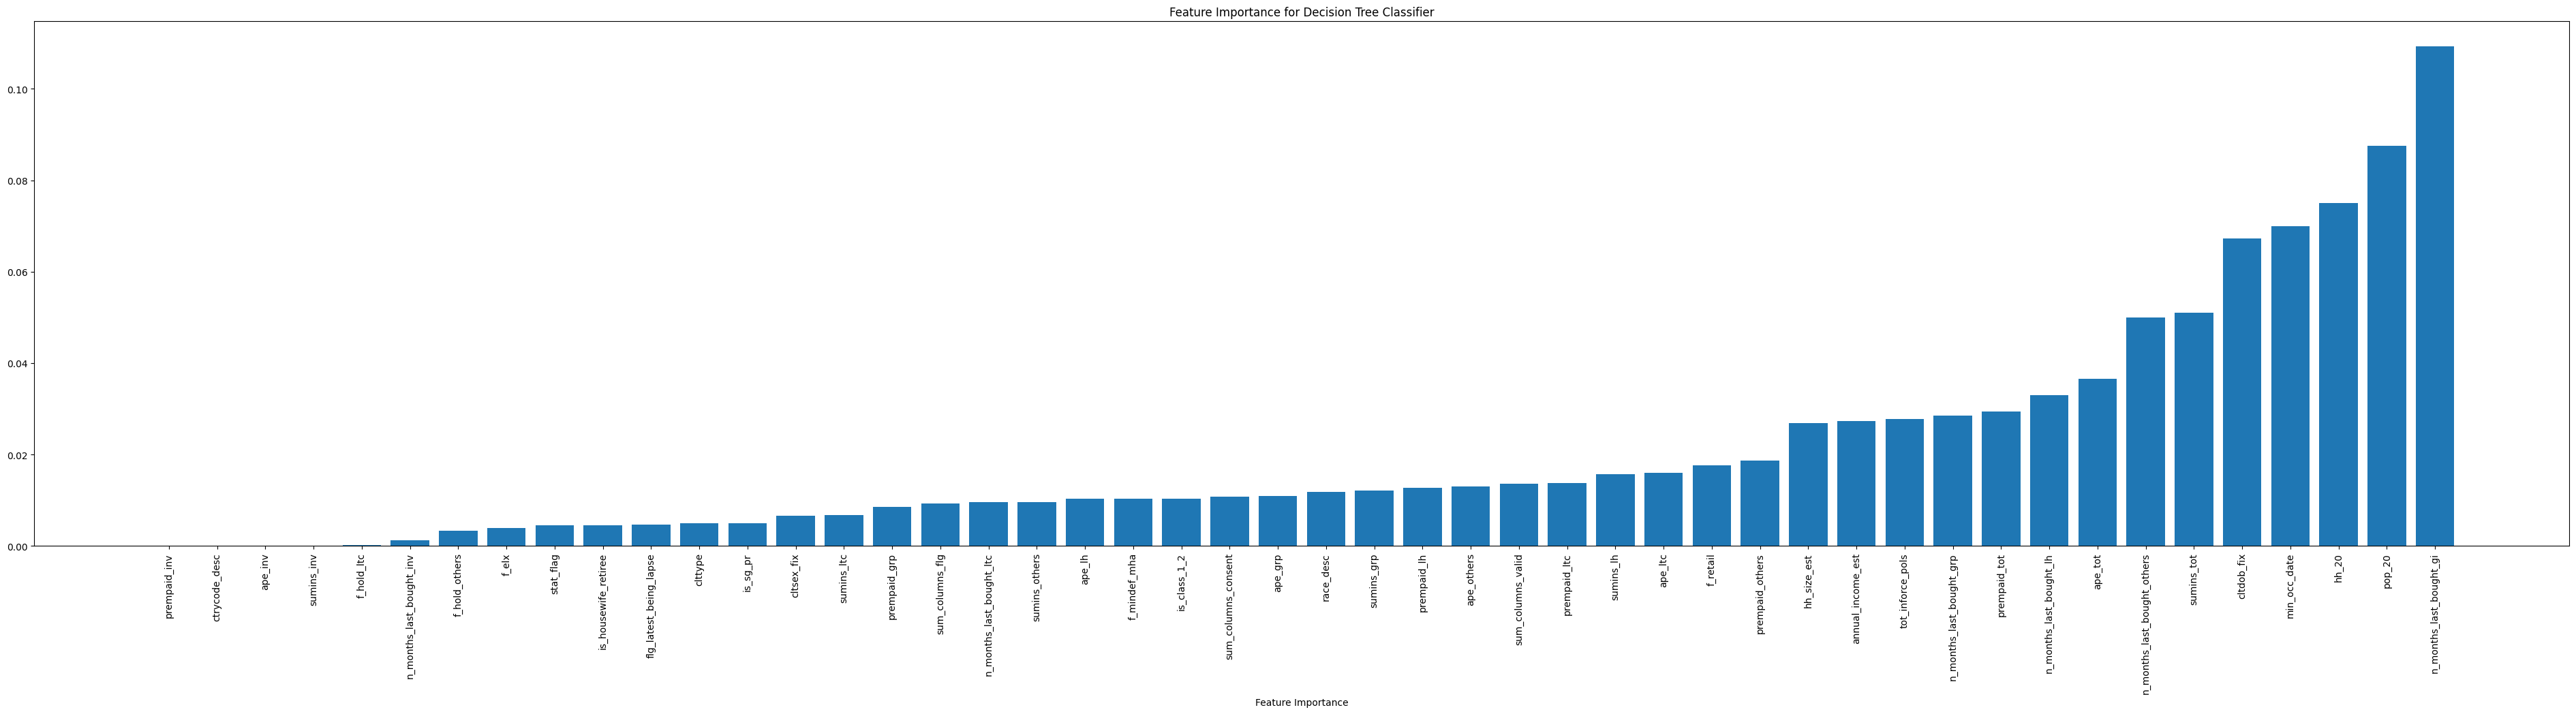

In [186]:

# Plot feature importance
fig = plt.figure(figsize=(x_train.shape[1],10))
plt.bar(range(x_train.shape[1]), feature_importance[sorted_idx])
plt.xticks(range(x_train.shape[1]), [x_train.columns[i] for i in sorted_idx], rotation='horizontal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Decision Tree Classifier')
pl.xticks(rotation=90)
plt.show()

In [187]:
#We will drop columns with feauture importances very closely to 0 for feature selection
Drop_col = ['ape_inv', 'ctrycode_desc','sumins_inv', 'f_hold_ltc', 'prempaid_inv']
train = train.drop(Drop_col, axis=1)

In [188]:
#nominal variable: 'race_desc', 'clttype', 'stat_flag'
final = pd.get_dummies(train, columns=['race_desc', 'clttype', 'stat_flag'], drop_first=True)

In [189]:
for column in final.columns:
    unique_values = final[column].unique()
    print(column, ": ", unique_values, "\n")

min_occ_date :  [ 75 200  53  27  66  78  14  64 130  76  85  12 136   6  37 168  48 157
 123  93 159  46  38  98 144  18  36 242  42 146   8  88 185  40  21 251
 137 106 154  61  58  29 199 162 112 119 217 150 173  33  41 161  19 198
  77  22 104  20 101  68  83  74  45 188  30  73 133  81  59   9  31  44
 216 164 462 187   7 180 194 102  51 118 404  60 141 139 115 191 155 158
  24  16 121 148 124  43  25 179 163 244  86 140  10 259 182  34 393  39
 273  54 149 235  67 175 224 193 270  87 201 167  84 228  11 222 238 107
 103  96 109  55 131 549  91  23 110 100 181  56  95  17 210 208 152 174
  71 204 132  92 129 128 166  80  57 186 156 114 143 135 190  99  62 256
  90 171 138  15 153 261  65 165 226  13 302  82 332 176 225 122 307 116
 151 177  35 309 253 105 170 220 195  79 247 219 354  89  70 376 329 113
  49 189 134  72 214 127 398  63 183  52 437  50  47 160  32 145 120 409
 421 111 212 117 250 108 172 249 211 351 229 178  26 239 367 336  69  97
 237 207 215 272  28 262 485 205 20

In [190]:
final = final.astype('int')
final.describe

<bound method NDFrame.describe of        min_occ_date  cltdob_fix  cltsex_fix  is_housewife_retiree  is_sg_pr  \
0                75          50           0                     0         1   
1               200          45           1                     0         1   
2                53          48           1                     0         1   
3                27          48           0                     0         1   
4                66          29           0                     0         1   
...             ...         ...         ...                   ...       ...   
17695            89          30           1                     0         1   
17696           406          76           1                     0         1   
17697           193          57           0                     0         1   
17698           196          38           1                     0         1   
17699           147          54           1                     0         1   

       is_class_1

In [191]:
newtrain = final.copy()
X = newtrain.drop(columns=['f_purchase_lh'])
y = final['f_purchase_lh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
print("Class distribution before oversampling:", y_train.value_counts())

# Apply SMOTE to the training data only
smote = SMOTE(random_state=2024)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Summarize class distribution after oversampling
print("Class distribution after oversampling:", y_resampled.value_counts())

# Train a simple classifier (Random Forest) on the resampled data
clf = RandomForestClassifier(random_state=2024)
clf.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Class distribution before oversampling: f_purchase_lh
0    13598
1      562
Name: count, dtype: int64
Class distribution after oversampling: f_purchase_lh
0    13598
1    13598
Name: count, dtype: int64


Accuracy on the test set: 0.9497175141242938


### Section 4: Modelling and Cross Validation

In [192]:
#We are using random forest for modelling, our cross validation method is k-fold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [193]:
#We wil evaluate our models with cross_val_score
dt_clf = DecisionTreeClassifier()
model = dt_clf
X = X_resampled
y = y_resampled

In [194]:
# Assuming your dataframe is named 'df' and the target variable is in 'target_column'
# Replace 'target_column' with the actual name of your target column

# Set the number of folds
num_folds = 10

# Create a DataFrame to store the results
results_df = pd.DataFrame(index=range(2, num_folds + 1), columns=['Mean_Cross_Val_Score'])

# Loop through each value of k in k-fold
for k in range(2, num_folds + 1):
    kf = KFold(n_splits=k, shuffle=True, random_state=2024)
    
    # Create Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2024)
    
    # Perform k-fold cross-validation and store results
    cross_val_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')
    
    # Calculate mean cross-validation score
    mean_cross_val_score = cross_val_scores.mean()
    
    # Store the result in the DataFrame
    results_df.loc[k, 'Mean_Cross_Val_Score'] = mean_cross_val_score

# Print the results DataFrame
print(results_df)

   Mean_Cross_Val_Score
2              0.967458
3              0.972386
4              0.974518
5              0.975732
6              0.976173
7               0.97621
8              0.977055
9              0.977276
10             0.977423


In [195]:
#We discovered that when k=10, cross_val_score is the highest
#To avoid overfitting, we decide to use rfe to conduct further selections
from sklearn.feature_selection import SelectFromModel

num_folds = 10

results_df = pd.DataFrame(index=range(2, num_folds + 1), columns=['Mean_Cross_Val_Score'])

for k in range(2, num_folds + 1):
    kf = KFold(n_splits=k, shuffle=True, random_state=2024)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2024)
    
    # Create a feature selection model based on Random Forest importance
    feature_selector = SelectFromModel(rf_classifier)
    
    # Transform the data to include only important features
    X_selected = feature_selector.fit_transform(X, y)
    
    # Perform k-fold cross-validation on the reduced feature set
    cross_val_scores = cross_val_score(rf_classifier, X_selected, y, cv=kf, scoring='accuracy')
    
    # Calculate mean cross-validation score
    mean_cross_val_score = cross_val_scores.mean()
    
    # Store the result in the DataFrame
    results_df.loc[k, 'Mean_Cross_Val_Score'] = mean_cross_val_score

# Print the results DataFrame
print(results_df)

   Mean_Cross_Val_Score
2              0.956795
3              0.963781
4              0.966061
5              0.967164
6              0.966686
7               0.96812
8               0.96801
9              0.967863
10             0.968157


In [205]:
#It turned out that reducing columns would result in loss of mean_cross_val_score, we decide to maintain it as the same.
#We decided to preserve the model with 10 folds
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
# Set the number of folds
num_folds = 10

# Create k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=2024)

# Create Random Forest Classifier with 100 estimators
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2024)

# Train the model on the entire dataset
rf_classifier.fit(X, y)

y_probas = cross_val_predict(rf_classifier, X, y, cv=kf)
correct_predictions = (y_probas == y)

accuracy = accuracy_score(y, y_probas)
print("Accuracy:", accuracy)
print("Correct Predictions Series:")
print(correct_predictions)

Accuracy: 0.9774231504633034
Correct Predictions Series:
0        True
1        True
2        True
3        True
4        True
         ... 
27191    True
27192    True
27193    True
27194    True
27195    True
Name: f_purchase_lh, Length: 27196, dtype: bool


In [206]:
import joblib
joblib.dump(rf_classifier, 'random_forest_model.joblib')

['random_forest_model.joblib']

### Section 5: Evaluate the Performance of model

In [199]:
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [200]:
rf_classifier = joblib.load('random_forest_model.joblib')

In [201]:
# We are evaluating the fitness of the model using Precision, Recall, F1_Score, Mean_Balanced Accuracy
kf = KFold(n_splits=10, shuffle=True, random_state=2024)

# Lists to store results across folds
precision_scores = []
recall_scores = []
f1_scores = []
balanced_accuracy_scores = []
auc_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_classifier.predict(X_test)

    # Calculate metrics for this fold
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    auc_value = roc_auc_score(y_test, y_pred)
    # Store results for this fold
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    balanced_accuracy_scores.append(balanced_acc)
    auc_scores.append(auc_value)

# Calculate mean scores across folds
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_balanced_accuracy = np.mean(balanced_accuracy_scores)
mean_auc = np.mean(auc_scores)

# Print mean scores
print(f'Mean Precision: {mean_precision:.2f}')
print(f'Mean Recall: {mean_recall:.2f}')
print(f'Mean F1 Score: {mean_f1:.2f}')
print(f'Mean Balanced Accuracy: {mean_balanced_accuracy:.2f}')
print(f'Mean AUC: {mean_auc:.2f}')

Mean Precision: 0.98
Mean Recall: 0.97
Mean F1 Score: 0.98
Mean Balanced Accuracy: 0.98
Mean AUC: 0.98


#### Section 6: preprocessing function

In [312]:
def preprocessing(df):
    df.drop_duplicates()
    df.drop('clntnum',axis=1,inplace=True)
    df=df.drop(dropcol, axis=1)
    df = df[df['cltsex_fix'].notna()]
    df = df[df['ctrycode_desc'].notna()]
    df['race_desc'].replace({'Chinese':1, 'Malay':2, 'Indian':3, 'Others':4}, inplace=True)
    for col in missingless10:
        if df[col].isna().sum()>0:
            df.loc[:,col] = df.loc[:,col].fillna(df[col].mode()[0])
    df.loc[:,'hh_size'] = df.loc[:,'hh_size'].fillna(df['hh_size'].mean())
    df.loc[:,'pop_20'] = df.loc[:,'pop_20'].fillna(df['pop_20'].median()) 
    df.loc[:,'hh_20'] = df.loc[:,'hh_20'].fillna(df['hh_20'].median())
    mapping = {'1':1, '2':2, '3':3, '4':4, '>4':5}
    df.loc[:,'hh_size_est'] = df.loc[:,'hh_size_est'].map(mapping)
    rows = df[df['hh_size_est'].isnull()].index.tolist()
    if rows != []:
        for row in rows:
            df.loc[row,'hh_size_est'] = hhest(df.loc[row,'hh_size'])
    mapping = {'A.ABOVE200K':1, 'B.100K-200K':2, 'C.60K-100K':3, 'D.30K-60K':4, 'E.BELOW30K':5}
    df.loc[:,'annual_income_est'] = df.loc[:,'annual_income_est'].map(mapping)
    if df['annual_income_est'].isna().sum()>0:
        random_sample_df = df['annual_income_est'].dropna().sample(df['annual_income_est'].isnull().sum(),
                                                                      random_state=2024)
        random_sample_df.index = df[df['annual_income_est'].isnull()].index
        df.loc[df['annual_income_est'].isnull(), 'annual_income_est'] = random_sample_df
    df.drop('hh_size',axis=1,inplace=True)
    df['ctrycode_desc'].replace({'Not Applicable': 'Unknown', 'Unknown Country Code':'Unknown'}, inplace=True)
    df['ctrycode_desc'].replace({
        'United Kingdom':'Others',
        'United States':'Others',
        'China':'Others',
        'Taiwan (R.O.C)':'Others',
        'United Arab Emirates':'Others',
        'Thailand':'Others',
        'Philippines':'Others',
        'Japan':'Others',
        'Hong Kong':'Others',
        'Denmark':'Others',
        'South Africa':'Others',
        'New Zealand':'Others',
        'Bosnia-Herzegovina':'Others',
        'Italy':'Others',
        'Netherlands':'Others',
        'Spain':'Others',
        'Ireland':'Others',
        'Sweden':'Others',
        'Brunei Darussalam':'Others',
        'Canada':'Others'
        },inplace=True)
    df['cltsex_fix'].replace({'Female':0, 'Male':1},inplace=True)
    df = df[df['min_occ_date']!='None']
    df = df[df['cltdob_fix']!='None']
    df['min_occ_date'] = pd.to_datetime(df['min_occ_date'])
    df['cltdob_fix'] = pd.to_datetime(df['cltdob_fix'])
    df = df[df['min_occ_date']>df['cltdob_fix']]
    today = date.today()
    df['cltdob_fix'] = today.year - df['cltdob_fix'].dt.year 
    df = df[df['cltdob_fix'].apply(lambda x: (x-(df['cltdob_fix'].mean()))/df['cltdob_fix'].std() <3)]
    df.loc[:,'min_occ_date'] = df.loc[:,'min_occ_date'].apply(convert_to_month)
    df = df[df['min_occ_date']<648]
    return df

In [327]:
def process_join_flg(df):
    df=df.drop(['flg_is_revised_term','flg_has_life_claim','flg_with_preauthorisation',
             'is_consent_to_email','flg_latest_being_cancel'], axis=1)
    columns_flg = ['flg_substandard','flg_is_borderline_standard', 'flg_is_rental_flat',
               'flg_has_health_claim', 'flg_gi_claim', 'flg_is_proposal','flg_is_returned_mail']
    df['sum_columns_flg'] = df.loc[:,columns_flg].sum(axis=1)
    columns_consent = ['is_consent_to_mail','is_consent_to_call','is_consent_to_sms']
    df['sum_columns_consent'] = df.loc[:,columns_consent].sum(axis=1)
    columns_consent = ['is_consent_to_mail','is_consent_to_call','is_consent_to_sms']
    df['sum_columns_valid'] = df.loc[:,columns_valid].sum(axis=1)
    Drop_col =['flg_substandard','flg_is_borderline_standard', 'flg_is_rental_flat',
          'flg_has_health_claim', 'flg_gi_claim', 'flg_is_proposal',
          'flg_is_returned_mail', 'is_consent_to_mail', 'is_consent_to_call',
          'is_consent_to_sms', 'is_valid_dm', 'is_valid_email']
    df = df.drop(Drop_col, axis=1)
    return df

In [299]:
def dummy(df):
    df = pd.get_dummies(df, columns=['race_desc', 'clttype', 'stat_flag'], drop_first=True)
    return df

In [300]:
def process_join_nmonth(df):
    ever_bought_col = [col for col in newtrain.columns if col.startswith('f_ever_bought_')]
    df = df.drop(ever_bought_col,axis=1)
    for col in nmonth.columns:
        df[col] = df[col]/12

In [314]:
def process_join_fhold(df):
    f_hold_col = [col for col in newtrain.columns if col.startswith('f_hold_')]
    holdtrain = df[f_hold_col].copy()
    holdtrain[f_hold_col] = holdtrain[f_hold_col].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    df['f_hold_others'] = df[f_hold_col].apply(lambda row: row.sum(), axis=1) 
    return df

In [336]:
def paycol(df):
    Drop_col = ['ctrycode_desc', 'f_hold_ltc']
    df = df.drop(Drop_col, axis=1)

In [333]:
def process_paycols(train):
    newtrain = train.copy()
    ape_grp = [col for col in train.columns if col.startswith('ape_grp_')]
    ape_gi = [col for col in train.columns if col.startswith('ape_gi_')]
    ape_lh = [col for col in train.columns if col.startswith('ape_lh_')]
    ape_ltc =[col for col in train.columns if col.startswith('ape_ltc_')]
    ape_inv = [col for col in train.columns if col.startswith('ape_inv_')]
    ape_tot = [col for col in train.columns if col.startswith('ape_')]


    newtrain[ape_tot] = newtrain[ape_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train[ape_tot] = train[ape_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train['ape_grp_test'] = newtrain[ape_grp].apply(lambda row: row.sum(), axis=1)
    train['ape_gi_test'] = newtrain[ape_gi].apply(lambda row: row.sum(), axis=1)
    train['ape_lh_test'] = newtrain[ape_lh].apply(lambda row: row.sum(), axis=1)
    train['ape_ltc_test'] = newtrain[ape_ltc].apply(lambda row: row.sum(), axis=1)
    train['ape_inv_test'] = newtrain[ape_inv].apply(lambda row: row.sum(), axis=1)
    unequal_rows = train[train['ape_ltc_test'] != train['ape_ltc']]

    # for ape_gi records, the manually computed value exactly matches with the original column
    unequal_rows = train[train['ape_gi_test'] != train['ape_gi']]
    train = train.drop('ape_gi_test', axis=1)
    train = train.drop(ape_grp, axis=1)
    train = train.drop(ape_gi, axis=1)
    train = train.drop(ape_inv, axis=1)
    train = train.drop(ape_ltc, axis=1)
    train = train.drop(ape_lh, axis=1)
    # the columns that are left with: "ape_gi" "ape_ltc" "ape_grp_test" "ape_lh_test" "ape_inv_test"
    newtrain = train.copy()
    newtrain = newtrain.drop('ape_lh_test', axis=1)
    newtrain = newtrain.drop('ape_ltc', axis=1)
    newtrain = newtrain.drop("ape_grp_test", axis=1)
    newtrain = newtrain.drop("ape_inv_test", axis=1)
    newtrain = newtrain.drop("ape_gi", axis=1)
    ape_others = [col for col in newtrain.columns if col.startswith('ape_')]
    ape_others
    train['ape_others'] = train[ape_others].apply(lambda row: row.sum(), axis=1)
    train['ape_others']
    train = train.drop(ape_others, axis=1)
    ape_tot = [col for col in train.columns if col.startswith('ape_')]
    train['ape_tot']= train[ape_tot].apply(lambda row: row.sum(), axis=1)
    train['ape_tot']
    ape = [col for col in train.columns if col.startswith('ape')]
    prempaid = [col for col in train.columns if col.startswith('prempaid')]
    newtrain = train.copy()
    prempaid_grp = [col for col in train.columns if col.startswith('prempaid_grp_')]
    prempaid_gi = [col for col in train.columns if col.startswith('prempaid_gi_')]
    prempaid_lh = [col for col in train.columns if col.startswith('prempaid_lh_')]
    prempaid_ltc = [col for col in train.columns if col.startswith('prempaid_ltc_')]
    prempaid_inv = [col for col in train.columns if col.startswith('prempaid_inv_')]
    prempaid_tot = [col for col in train.columns if col.startswith('prempaid_')]
    newtrain[prempaid_tot] = newtrain[prempaid_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train[prempaid_tot] = train[prempaid_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train['prempaid_grp_test'] = newtrain[prempaid_grp].apply(lambda row: row.sum(), axis=1)
    train['prempaid_gi_test'] = newtrain[prempaid_gi].apply(lambda row: row.sum(), axis=1)
    train['prempaid_lh_test'] = newtrain[prempaid_lh].apply(lambda row: row.sum(), axis=1)
    train['prempaid_ltc_test'] = newtrain[prempaid_ltc].apply(lambda row: row.sum(), axis=1)
    train['prempaid_inv_test'] = newtrain[prempaid_inv].apply(lambda row: row.sum(), axis=1)
    unequal_rows = train[train['prempaid_ltc_test'] != train['prempaid_ltc']]

    ### 
    # Same logic as ape_ltc
    ###
    train = train.drop('prempaid_ltc_test', axis=1)
    # for prempaid_gi records, the manually computed value exactly matches with the original column
    unequal_rows = train[train['prempaid_gi_test'] != train['prempaid_gi']]
    train = train.drop('prempaid_gi_test', axis=1)
    train = train.drop(prempaid_grp, axis=1)
    train = train.drop(prempaid_gi, axis=1)
    train = train.drop(prempaid_inv, axis=1)
    train = train.drop(prempaid_ltc, axis=1)
    train = train.drop(prempaid_lh, axis=1)
    newtrain = train.copy()
    newtrain = newtrain.drop('prempaid_lh_test', axis=1)
    newtrain = newtrain.drop('prempaid_ltc', axis=1)
    newtrain = newtrain.drop("prempaid_grp_test", axis=1)
    newtrain = newtrain.drop("prempaid_inv_test", axis=1)
    newtrain = newtrain.drop("prempaid_gi", axis=1)
    prempaid_others = [col for col in newtrain.columns if col.startswith('prempaid_')]

    train['prempaid_others'] = train[prempaid_others].apply(lambda row: row.sum(), axis=1)
    train['prempaid_others']
    train = train.drop(prempaid_others, axis=1)
    prempaid_tot = [col for col in train.columns if col.startswith('prempaid_')]
    train['prempaid_tot']= train[prempaid_tot].apply(lambda row: row.sum(), axis=1)
    train['prempaid_tot']
    prempaid = [col for col in train.columns if col.startswith('prempaid')]
    sumins = [col for col in train.columns if col.startswith('sumins')]
    newtrain = train.copy()
    sumins_grp = [col for col in train.columns if col.startswith('sumins_grp_')]
    sumins_gi = [col for col in train.columns if col.startswith('sumins_gi_')]
    sumins_lh = [col for col in train.columns if col.startswith('sumins_lh_')]
    sumins_ltc = [col for col in train.columns if col.startswith('sumins_ltc_')]
    sumins_inv = [col for col in train.columns if col.startswith('sumins_inv_')]
    sumins_tot = [col for col in train.columns if col.startswith('sumins_')]
    newtrain[sumins_tot] = newtrain[sumins_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train[sumins_tot] = train[sumins_tot].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train['sumins_grp_test'] = newtrain[sumins_grp].apply(lambda row: row.sum(), axis=1)
    train['sumins_gi_test'] = newtrain[sumins_gi].apply(lambda row: row.sum(), axis=1)
    train['sumins_lh_test'] = newtrain[sumins_lh].apply(lambda row: row.sum(), axis=1)
    train['sumins_ltc_test'] = newtrain[sumins_ltc].apply(lambda row: row.sum(), axis=1)
    train['sumins_inv_test'] = newtrain[sumins_inv].apply(lambda row: row.sum(), axis=1)
    unequal_rows = train[train['sumins_ltc_test'] != train['sumins_ltc']]
    train = train.drop('sumins_ltc_test', axis=1)

    # for sumins_gi records, the manually computed value exactly matches with the original column
    unequal_rows = train[train['sumins_gi_test'] != train['sumins_gi']]
    train = train.drop('sumins_gi_test', axis=1)
    train = train.drop(sumins_grp, axis=1)
    train = train.drop(sumins_gi, axis=1)
    train = train.drop(sumins_inv, axis=1)
    train = train.drop(sumins_ltc, axis=1)
    train = train.drop(sumins_lh, axis=1)
    newtrain = train.copy()
    newtrain = newtrain.drop('sumins_lh_test', axis=1)
    newtrain = newtrain.drop('sumins_ltc', axis=1)
    newtrain = newtrain.drop("sumins_grp_test", axis=1)
    newtrain = newtrain.drop("sumins_inv_test", axis=1)
    newtrain = newtrain.drop("sumins_gi", axis=1)
    sumins_others = [col for col in newtrain.columns if col.startswith('sumins_')]
    train['sumins_others'] = train[sumins_others].apply(lambda row: row.sum(), axis=1)
    train = train.drop(sumins_others, axis=1)
    sumins_tot = [col for col in train.columns if col.startswith('sumins_')]
    train['sumins_tot'] = train[sumins_tot].apply(lambda row: row.sum(), axis=1)
    sumins = [col for col in train.columns if col.startswith('sumins')]
    for column in train.columns:
        unique_values=train[column].unique()
        if len(unique_values) == 1:
            train.drop(column, axis=1, inplace=True)
    return train

In [310]:
def process_n_month(train):
    newtrain = train.copy()
    last_bought_col_grp = [col for col in train.columns if col.startswith('n_months_last_bought_grp')]
    newtrain[last_bought_col_grp] = newtrain[last_bought_col_grp].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train['n_months_last_bought_grp'] = newtrain[last_bought_col_grp].apply(lambda row: row.min(), axis=1)
    last_bought_col_ltc = [col for col in train.columns if col.startswith('n_months_last_bought_ltc')]
    last_bought_col_ltc = last_bought_col_ltc[1:]
    newtrain[last_bought_col_ltc] = newtrain[last_bought_col_ltc].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train['n_months_last_bought_ltc_check'] = newtrain[last_bought_col_ltc].apply(lambda row: row.min(), axis=1)
    train.loc[train['n_months_last_bought_ltc'] != train['n_months_last_bought_ltc_check'], 'n_months_last_bought_ltc'] = train['n_months_last_bought_ltc_check']
    last_bought_col_lh = [col for col in train.columns if col.startswith('n_months_last_bought_lh')]
    newtrain[last_bought_col_lh] = newtrain[last_bought_col_lh].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train['n_months_last_bought_lh'] = newtrain[last_bought_col_lh].apply(lambda row: row.min(), axis=1)
    last_bought_col_gi = [col for col in train.columns if col.startswith('n_months_last_bought_gi')]
    last_bought_col_inv = [col for col in train.columns if col.startswith('n_months_last_bought_inv')]
    newtrain[last_bought_col_inv] = newtrain[last_bought_col_inv].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train['n_months_last_bought_inv'] = newtrain[last_bought_col_inv].apply(lambda row: row.min(), axis=1)
    train = train.drop(last_bought_col_grp, axis=1)
    train = train.drop(last_bought_col_ltc, axis=1)
    train = train.drop(last_bought_col_lh, axis=1)
    train = train.drop(last_bought_col_inv, axis=1)
    train = train.drop('n_months_last_bought_ltc_check', axis=1)
    newtrain = train.copy()
    newtrain = newtrain.drop(['n_months_last_bought_products','n_months_last_bought_ltc',
                          'n_months_last_bought_gi','n_months_last_bought_grp',
                          'n_months_last_bought_lh','n_months_last_bought_inv'],axis=1)
    last_bought_col = [col for col in newtrain.columns if col.startswith('n_months_last_bought_')]
    train['n_months_last_bought_others'] = newtrain[last_bought_col].apply(lambda row: row.min(), axis=1)
    train = train.drop('n_months_last_bought_products',axis=1)

    #We now have columns with more specific contents on same topic
    train = train.drop(last_bought_col, axis=1)
    last_bought_col = [col for col in train.columns if col.startswith('n_months_last_bought_')]
    for column in last_bought_col:
        train[column] = pd.to_numeric(train[column])
    for column in last_bought_col:
        train.loc[train[column] == 9999, column] = 'never_bought'
    #for the rest numeric data: we drop ones that are larger than 648 since Singlife is established in 1970
    train[last_bought_col] = train[last_bought_col].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train[last_bought_col] = train[last_bought_col].apply(lambda col: col.where((col <= 648) | (pd.isna(col)), 'never_bought'))
    #remove negative values
    train[last_bought_col] = train[last_bought_col].apply(lambda col: pd.to_numeric(col, errors='coerce'))
    train[last_bought_col] = train[last_bought_col].apply(lambda col: col.where((col >= 0) | (pd.isna(col)), 'never_bought'))    
    nmonth = train[last_bought_col].copy()
    for col in nmonth.columns:
        train[col] = train[col].replace({'never_bought':0})
    for col in nmonth.columns:
        train[col] = train[col]/12
    ever_bought_col = [col for col in newtrain.columns if col.startswith('f_ever_bought_')]
    train = train.drop(ever_bought_col,axis=1)
    return train

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [328]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    loaded_rf_model = joblib.load('random_forest_model.joblib')
    df = preprocessing(hidden_data)
    df = process_join_fhold(df)
    df = process_join_flg(df)
    df = process_paycols(df)
    df = process_n_month(df)
    df = paycol(df)
    df = process_join_nmonth(df)
    df = dummy(df)
    result = loaded_rf_model.predict(df)
    return result

##### Cell to check testing_hidden_data function

In [337]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

AttributeError: 'NoneType' object has no attribute 'drop'

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!